In [167]:
# Importing all the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
       

# APPLICATION DATA

In [168]:
# Reading the application_data file
df=pd.read_csv("application_data.csv")

## Examining Application Data

In [169]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [170]:
df.shape

(307511, 122)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [172]:
df.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

# 1.Handling Missing/Null Values

In [173]:
#Filtering the columns with more than or equal to 40% NULL values.
null_values = df.isnull().sum()*100/len(df)
removable_columns = null_values[null_values>=40]
removable_columns

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [174]:
#dropping such columns
clean_df = df.drop(columns=removable_columns.index)

In [175]:
clean_df.shape

(307511, 73)

In [176]:
#Checking for NaN values in rows (if greater than 40%):
NaN_rows = clean_df.isnull().sum(axis=1)/clean_df.shape[1]
NaN_rows[NaN_rows>40]

Series([], dtype: float64)

#### Result of above analysis, no rows have NaN values greater than 40%

### Proceeding to further analysis

In [177]:
#Filtering the columns with less than or equal to 15% NULL values.
removable_columns_lower = null_values[(null_values<=15) & (null_values>0)].sort_values(ascending=False)
removable_columns_lower

AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

#### Either we can remove such columns or impute them with appropriate value(mean,median or mode)

####  Choosing the best course of action for columns that have missing values around 13%.

In [178]:
clean_df[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [179]:
clean_df[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.267395   
std                      1.869295                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.007000   
std                      0.204685                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_QRT  
count               265992.000000              265992.000000  
mean                     0.006402                   0.265474  
std                      0.083849                   0.794056  
min                      0.000000                   0.000000  
25%                      0.000000                   0.000000  
50%                      0.000000                   0.000000  
75%                      0.000000                   0.000000  
max                      4.000000                 261.000000

#### As evident visible from above results , it's safe to replace these missing values with 0.

In [180]:
#Replacing NA values with 0:

clean_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]= clean_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

####  Choosing the best course of action for columns that have missing values less than 13%.

In [181]:
#Missing values in Categorical variable NAME_TYPE_SUITE
clean_df['NAME_TYPE_SUITE'].fillna(clean_df.NAME_TYPE_SUITE.mode(), inplace=True)

In [182]:
clean_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

### Now some of the columns in this are irrelevant to our analysis and hence should be dropped

In [183]:
# Removing irrelevant columns:

irr_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

clean_df.drop(labels=irr_col,axis=1,inplace=True)

In [184]:
clean_df.shape

(307511, 44)

In [185]:
clean_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BURE

In [186]:
clean_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -2120        Laborers              1.0   
1             -291      Core staff              2.0   
2            -2531        Laborers              1.0   
3            -2437        Laborers              2.0   
4            -3458      Core staff              1.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Reli

# 2. Handling illogical Values in Columns

In [187]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### XNAs in  Column

In [188]:
# In Gender column
clean_df[df['CODE_GENDER']=='XNA'].shape

(4, 44)

In [189]:
clean_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Since only 4 values are XNA are majority is Female, So we can replace them with 'F'

In [190]:
clean_df.loc[clean_df['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'

In [191]:
clean_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [192]:
# In Organization column
clean_df[clean_df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 44)

In [193]:
clean_df['ORGANIZATION_TYPE'].describe()


count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

#### As evident , a very small proportion of the rows are having XNA values , so dropping them will not create much impact

In [194]:
# Removing such rows
clean_df=clean_df.drop(clean_df.loc[clean_df['ORGANIZATION_TYPE']=='XNA'].index)

### illogical Negative Values

In [195]:
#"DAYS_BIRTH"  'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' columns have negative values, which doesn't make sense
clean_df[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0            -9461           -637            -3648.0            -2120
1           -16765          -1188            -1186.0             -291
2           -19046           -225            -4260.0            -2531
3           -19005          -3039            -9833.0            -2437
4           -19932          -3038            -4311.0            -3458
...            ...            ...                ...              ...
307504      -16705          -7258            -9798.0             -259
307506       -9327           -236            -8456.0            -1982
307508      -14966          -7921            -6737.0            -5150
307509      -11961          -4786            -2562.0             -931
307510      -16856          -1262            -5128.0             -410

[252137 rows x 4 columns]

In [196]:
# Therefore we can convert these values into positive values using abs():
dcols = ['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']
clean_df[dcols] = clean_df[dcols].abs()

In [197]:
#converting above Days columns to Year for better understanding
clean_df[dcols] = clean_df[dcols]/365

In [198]:
# Hence Renaming them As YEARS_--
clean_df.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH' ,'DAYS_EMPLOYED':'YEARS_EMPLOYED' ,
    'DAYS_REGISTRATION':'YEARS_REGISTRATION' ,'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)

In [199]:
imputVAL = round(clean_df['CNT_FAM_MEMBERS'].median(),2)
print(f'Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn i.e. {imputVAL}')

Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn i.e. 2.0


# 3. Treatment of Outliers

In [200]:
# Checking Some important Numerical Columns
round(clean_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.9, 0.95]))

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
count          252137.0    252137.0     252125.0         251881.0
mean           175914.0    611398.0      27812.0         549406.0
std            258852.0    406527.0      14648.0         373269.0
min             25650.0     45000.0       1980.0          40500.0
5%              72000.0    143910.0       9000.0         135000.0
25%            112500.0    277970.0      17073.0         247500.0
50%            157500.0    521280.0      25834.0         450000.0
75%            211500.0    829224.0      35618.0         693000.0
90%            270000.0   1170000.0      46701.0        1125000.0
95%            355334.0   1350000.0      53712.0        1332000.0
max         117000000.0   4050000.0     258026.0        4050000.0

### Not much insight obtained from above so it would be better to create boxplots of above columns

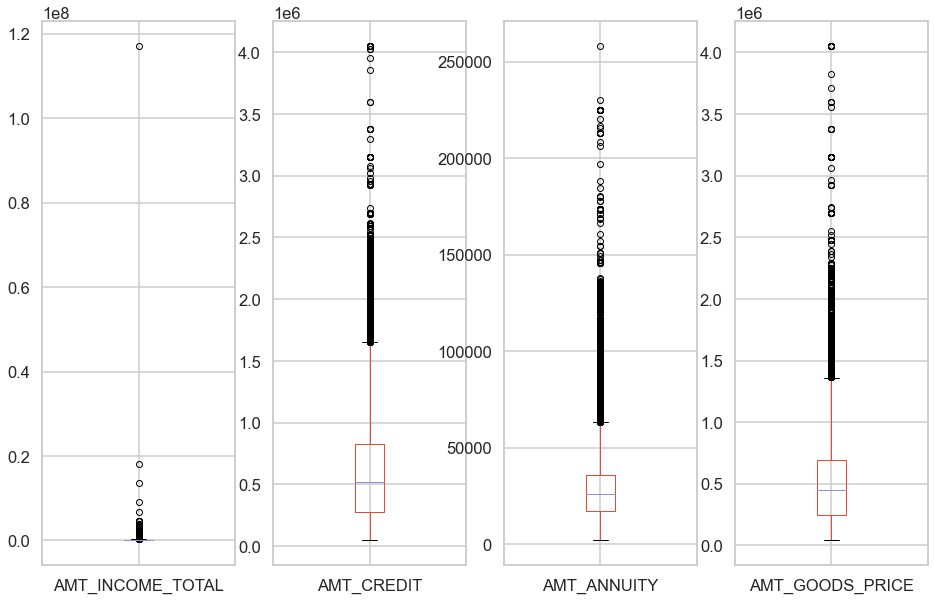

In [201]:
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    clean_df.boxplot(column = col)
plt.show()

### As evident Outliers are huge in above columns therefore will use 1.5 IQR rule to remove outliers.

In [202]:
for col in cols: 
    q1 = clean_df[col].quantile(0.25)
    q3 = clean_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    clean_df = clean_df.loc[(clean_df[col] > range_low) & (clean_df[col] < range_high)]

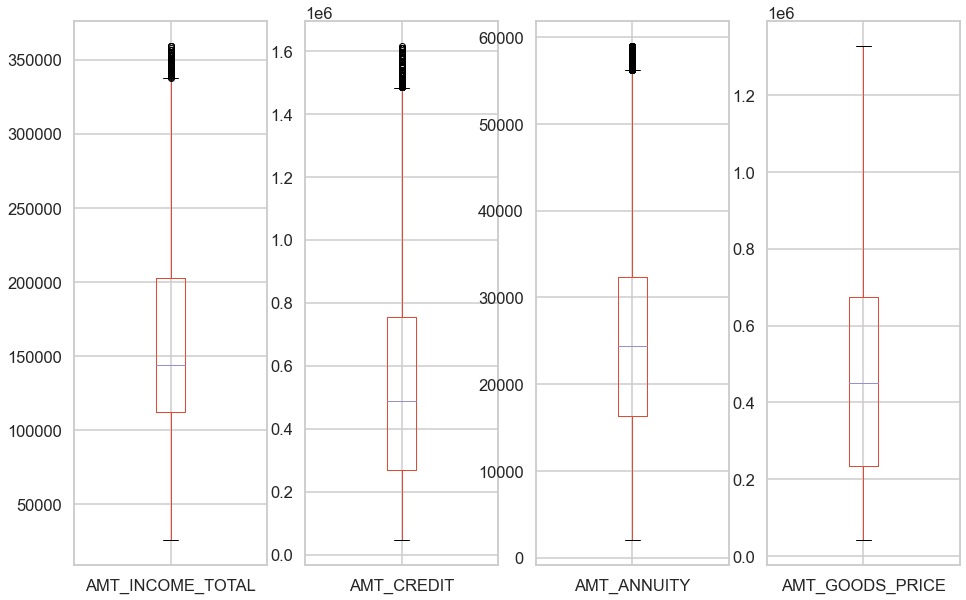

In [203]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    clean_df.boxplot(column = col)
plt.show()

# 4.Binning

In [204]:
#### Binning `AMT_INCOME_TOTAL` , `YEARS_BIRTH`, `AMT_CREDIT` 
print(clean_df['AMT_INCOME_TOTAL'].describe())
q25 = clean_df['AMT_INCOME_TOTAL'].quantile(0.25)
q60 = clean_df['AMT_INCOME_TOTAL'].quantile(0.60)

q25,q60

count    226289.000000
mean     156582.171898
std       62325.701133
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      359100.000000
Name: AMT_INCOME_TOTAL, dtype: float64


(112500.0, 157500.0)

In [205]:
#Creating A new categorical variable based on total income
clean_df['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])
clean_df['INCOME_GROUP']=pd.qcut(clean_df['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [206]:
# Creating age Category group
# Binning YEARS_BIRTH
abs(clean_df['YEARS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0    20.517808
0.1    27.372603
0.3    33.553425
0.6    42.726027
0.8    49.912329
1.0    69.041096
Name: YEARS_BIRTH, dtype: float64

In [207]:
#Creating a column AGE using DAYS_BIRTH
clean_df['AGE']=abs(clean_df['YEARS_BIRTH'])

In [208]:
## Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
clean_df['AGE_GROUP'] = pd.cut(clean_df['AGE'],bins=np.arange(20,71,5))

#### Similarly for Credit Amount we will create bins and appropriate categorical group

In [209]:
print(round(clean_df['AMT_CREDIT'].describe(), 3))
q50 = clean_df['AMT_CREDIT'].quantile(0.5)
q75 = clean_df['AMT_CREDIT'].quantile(0.75)

q50,q75

count     226289.000
mean      540733.191
std       320149.776
min        45000.000
25%       270000.000
50%       486459.000
75%       755190.000
max      1615018.500
Name: AMT_CREDIT, dtype: float64


(486459.0, 755190.0)

In [210]:
# Creating Credit Amount group
def credit_category(value):
    if value <= q50:
        return 'Low'
    elif value > q50 and value <= q75:
        return 'Medium'
    else:
        return 'High'

clean_df['CREDIT_CATEGORY'] = clean_df['AMT_CREDIT'].apply(credit_category)

In [211]:
clean_df['CREDIT_INCOME_RATIO']=round((clean_df['AMT_CREDIT']/clean_df['AMT_INCOME_TOTAL']))

# 5. Imbalance in the Target variable

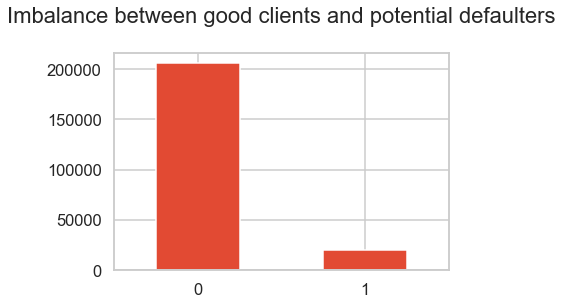

In [212]:
# Graphical Readings of Target Variable Column
clean_df['TARGET'].value_counts().plot(kind='bar')
plt.title('Imbalance between good clients and potential defaulters')
plt.xticks(rotation = 0)
plt.show()

#### We can see there is a huge imbalance in Target Column. So we can segregate the Target variable into two good_clients and potential_defaulters.

In [213]:
# Creating a seperate dataframe for good_clients(Target == 0) 
good_clients = clean_df.loc[clean_df['TARGET'] == 0]
good_clients.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
1                    0.003541    45.931507        3.254795   
2                    0.010032    52.180822        0.616438   
3                    0.008019    52.068493        8.326027   
4                    0.028663    54.608219        8.323288   
5                    0.035792    46.413699        4.350685   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1            3.249315          0.797260      Core staff              2.0   
2           11.671233          6.934247        Laborers              1.0   
3           26.939726          6.676712        Laborers              2.0   
4           11.810959          9.473973      Core staff              1.0   
5           13.616438          1.306849        Laborers              2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   
5                       0               

In [214]:
# Creating a seperate dataframe for defaulter_clients(Target == 1) 
defaulter_clients = clean_df.loc[clean_df['TARGET'] == 1]
defaulter_clients.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0        100002       1         Cash loans           M            N   
26       100031       1         Cash loans           F            N   
40       100047       1         Cash loans           M            N   
42       100049       1         Cash loans           F            N   
110      100130       1         Cash loans           F            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 Y             0          202500.0    406597.5      24700.5   
26                Y             0          112500.0    979992.0      27076.5   
40                Y             0          202500.0   1193580.0      35028.0   
42                N             0          135000.0    288873.0      16258.5   
110               Y             1          157500.0    723996.0      30802.5   

     AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           351000.0   Unaccompanied               Working   
26          702000.0   Unaccompanied               Working   
40          855000.0   Unaccompanied  Commercial associate   
42          238500.0   Unaccompanied               Working   
110         585000.0   Unaccompanied  Commercial associate   

               NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0    Secondary / secondary special  Single / not married  House / apartment   
26   Secondary / secondary special                 Widow  House / apartment   
40   Secondary / secondary special               Married  House / apartment   
42   Secondary / secondary special        Civil marriage  House / apartment   
110              Incomplete higher             Separated  House / apartment   

     REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
0                      0.018801    25.920548        1.745205   
26                     0.018029    51.298630        7.200000   
40                     0.025164    47.895890        3.457534   
42                     0.007305    36.668493        9.854795   
110                    0.007274    28.838356        0.731507   

     YEARS_REGISTRATION  YEARS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0              9.994521          5.808219        Laborers              1.0   
26            18.008219          5.005479   Cooking staff              1.0   
40             3.238356          2.819178        Laborers              2.0   
42             0.123288         12.079452     Sales staff              2.0   
110            1.060274          8.739726     Sales staff              2.0   

    WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    WEDNESDAY                       10   
26                      MONDAY                        9   
40                     TUESDAY                        9   
42                    THURSDAY                       11   
110                     SUNDAY                       12   

     REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                             0                           0   
26                            0                           0   
40                            0                           0   
42                            0                           0   
110                           0                           1   

     LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                              0                       0   
26                             0                       0   
40                             0                       0   
42                             0                       0   
110                            1                       0   

     REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                         0                        0  Business Entity Type 3   
26                        0                        0  Business Entity Type 3   
40                        0                        0  Busine

# 6.Exploratory Data Analysis

## UNIVARIATE ANALYSIS

In [215]:
# Writing a reusable function to plot visualizations against categorical values
def unianalysis(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=good_clients,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Good_Clients',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between potential defaulters and good_clients
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(good_clients))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=defaulter_clients,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between potential defaulters and good_clients
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(defaulter_clients))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()
    

### A) CATEGORICAL COLUMNS ANALYSIS

#### CODE_GENDER

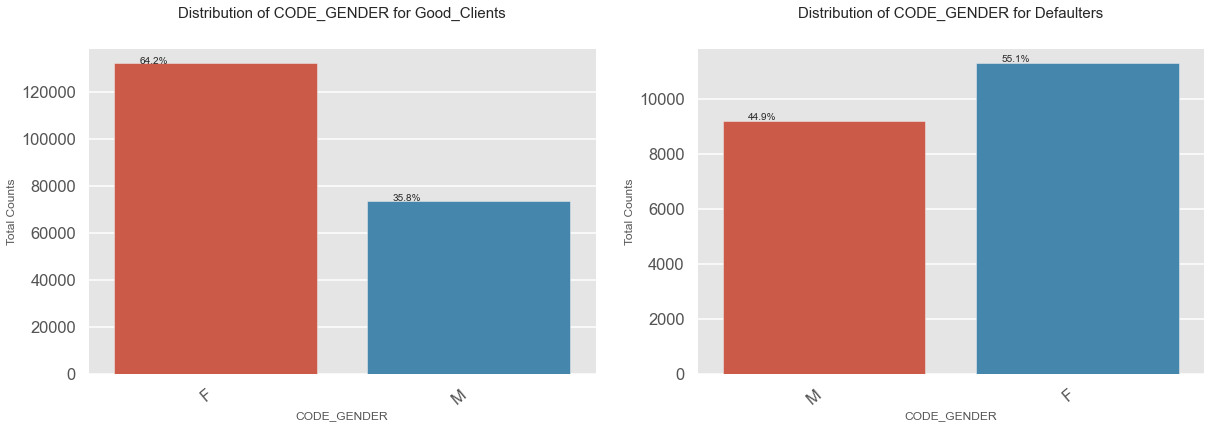

In [216]:
unianalysis('CODE_GENDER')

#### Insights obtained from above analysis:
##### 1) Female contribution towards good clients is 64.2 % and 56.1 % towards potential defaulters. 
##### 2) Male contribution towards good clients is 35.8 % and 44.9 % towards potential defaulters. 
##### 3)Count of Female applicants is much higher than male applicants.
##### 4)Conclusion : Males are much more likely to be a defauter than Females.

#### FLAG_OWN_CAR

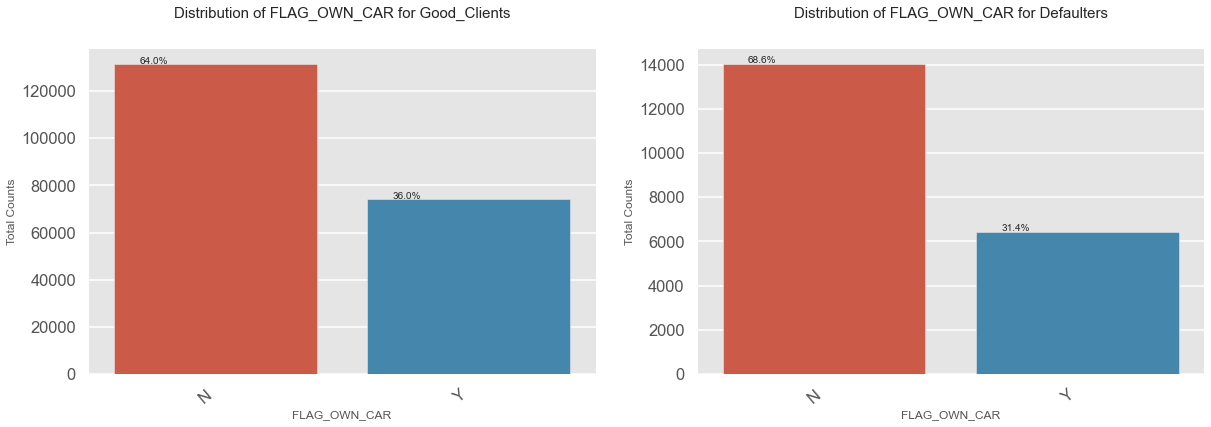

In [217]:
unianalysis('FLAG_OWN_CAR')

#### Insights obtained from above analysis:
##### 1) People who own a car contribution towards good clients is 36  % and  31.4 % towards potential defaulters. 
##### 2) People who Do Not own a Car contribution towards good clients is 64 % and 68.6 % towards potential defaulters. 
##### 3) In both cases , the count of client who do not own car is higher than who owns a car.
##### 4)Conclusion : Relatively, People who own a car are less likely to default.

#### NAME_INCOME_TYPE

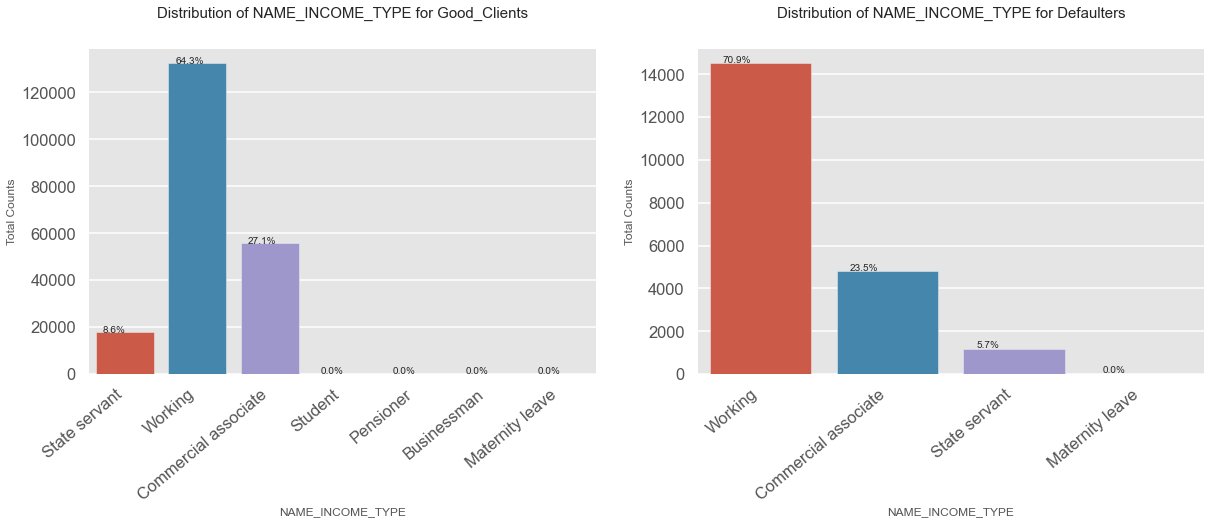

In [218]:
unianalysis('NAME_INCOME_TYPE')

#### Insights obtained from above analysis:
##### 1) Working class people top the list in both the cases with 64.3 % as good clients and 70.9 % as defaulter
##### 2) Other Majority includes State servant and Commercial Associate likely to take loans
##### 3) The remaining categories of income types are very small.
##### 4)Conclusion : Working class people are more likely to default.

#### NAME_FAMILY_STATUS

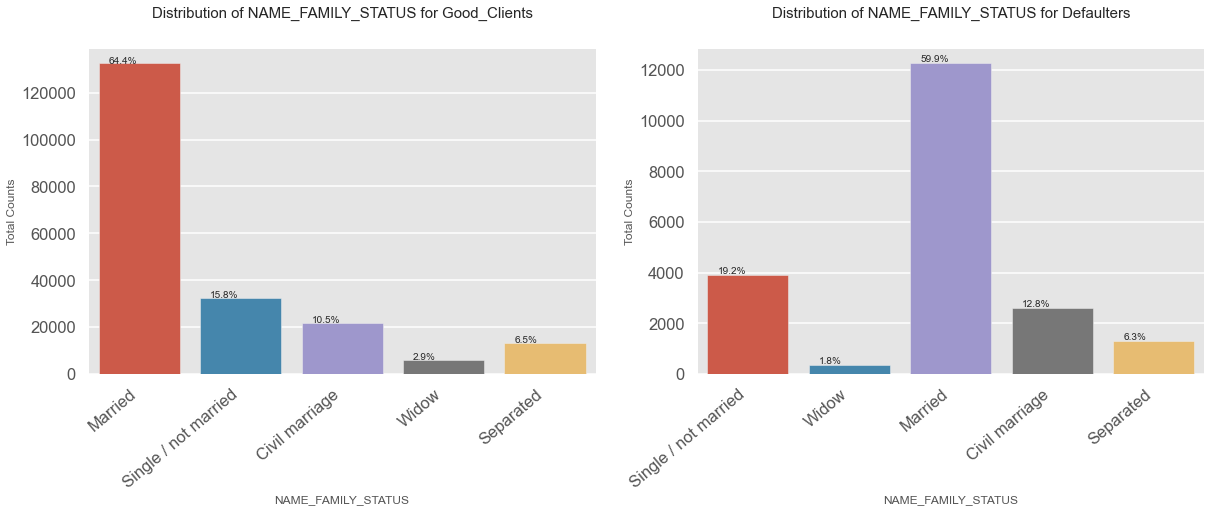

In [219]:
unianalysis('NAME_FAMILY_STATUS')

#### Insights obtained from above analysis:
##### 1) Maried people are tend to apply for loan , more than others.
##### 2) Widows are much lesss likely to apply for loans.
##### 3)Conclusion : Civil Marriage followed by Singles are more likely to default than others.

### NAME_HOUSING_TYPE

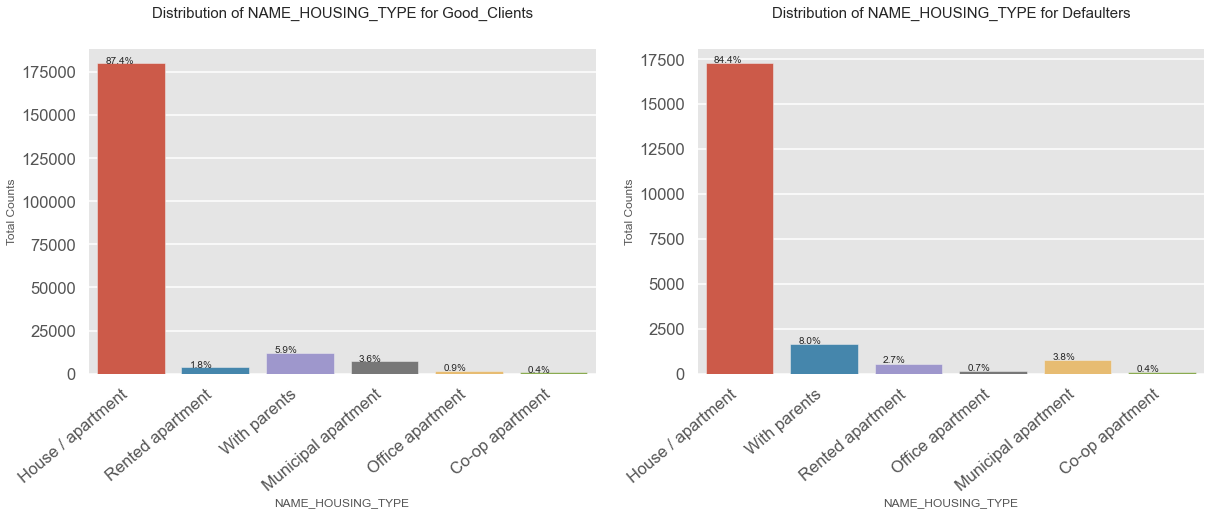

In [221]:
unianalysis('NAME_HOUSING_TYPE')

#### Insights obtained from above analysis:
##### 1) People generally apply for Housing loans and are table toppers in both the cases
##### 2) Except People staying with parents others people applying for loans are significantly low.
##### 3)Conclusion : People Staying with Parents are more likely to default maybe due to the increased Expenditures.

#### NAME_EDUCATION_TYPE

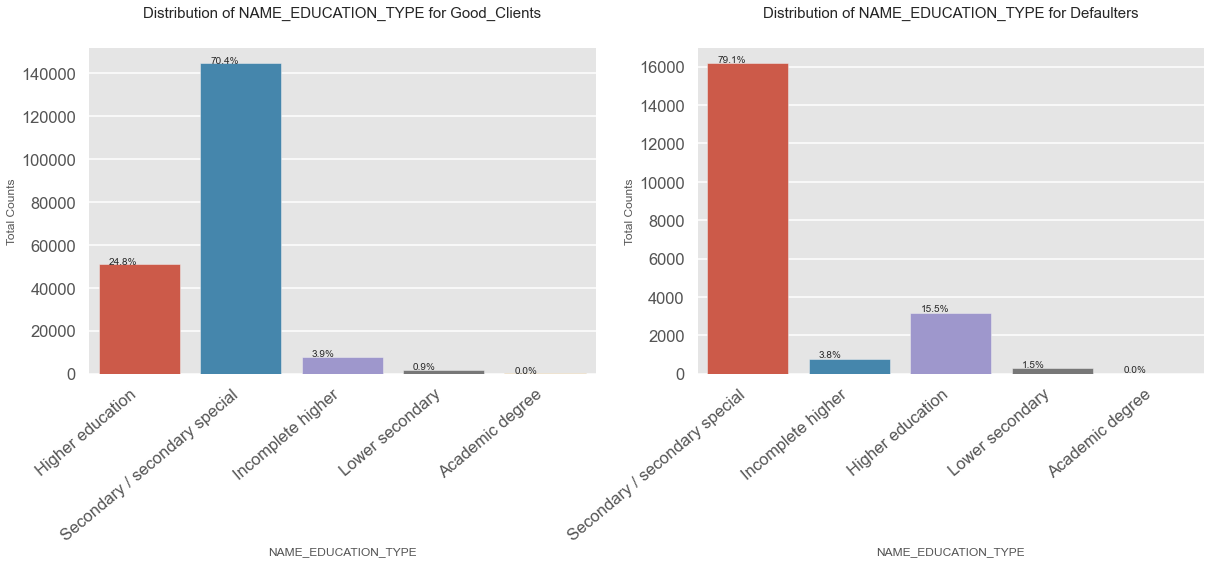

In [222]:
unianalysis('NAME_EDUCATION_TYPE')

#### Insights obtained from above analysis:
##### 1) Applicants with secondary and higher secondary education heavily apply for loans and are table toppers in both the cases.
##### 2) Whereas people with Academic degrees apply less and are less likely to default as well.
##### 3)Conclusion : Clearly Evident that "The chances of default is lower as the education level of the applicants increases".

### B) NUMERICAL-CATEGORICAL  COLUMNS ANALYSIS

#### AGE_GROUP

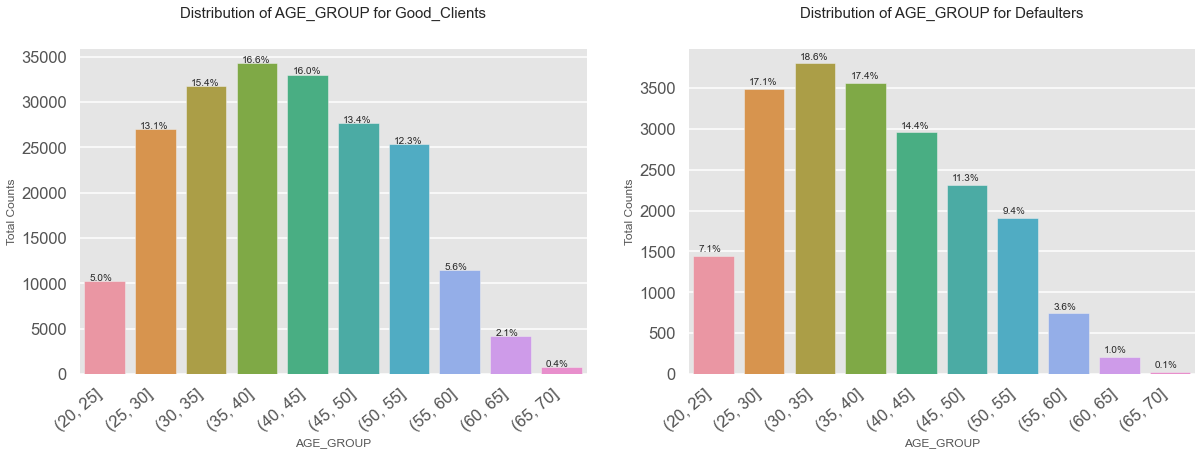

In [223]:
unianalysis('AGE_GROUP')

#### Insights obtained from above analysis:
##### 1) We see that (25,30]  and (30,35] age groups are more likely to default . So they are the riskiest people to loan to.
##### 2) We can see that after mid age as the ages is increasing people likely to default is decreasing
##### 3)Conclusion : Safe to lend to loan among higher age groups.

#### INCOME_GROUP

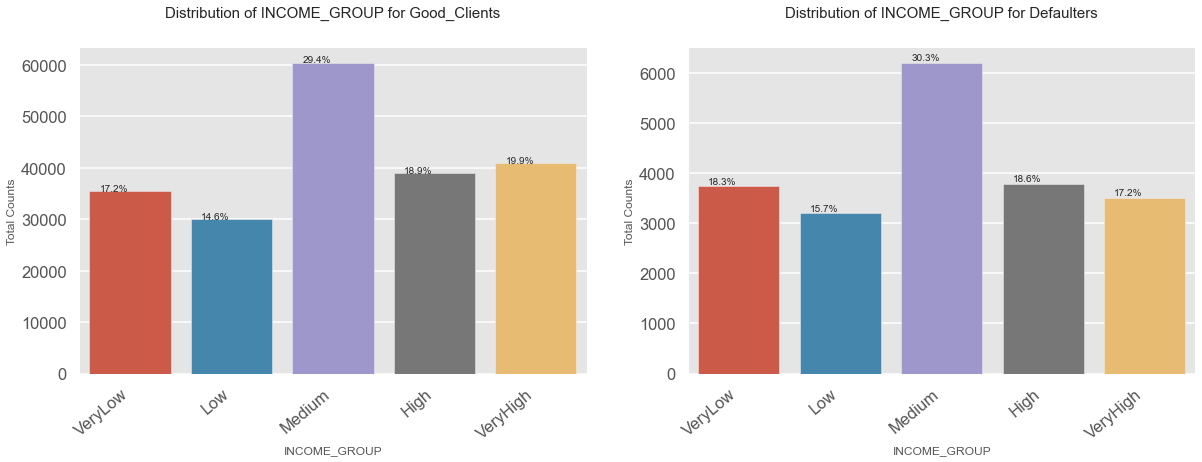

In [224]:
unianalysis('INCOME_GROUP')

#### Insights obtained from above analysis:
##### 1) People with mid range income apply heavily for loans are table toppers in both cases.
##### 2) 29.4 % of them are among good clients and 30.3 % of them are among potential defaulters.
##### 3)Conclusion : It's Safe to presume that the very high income people are likely to default less often.

### CREDIT_CATEGORY

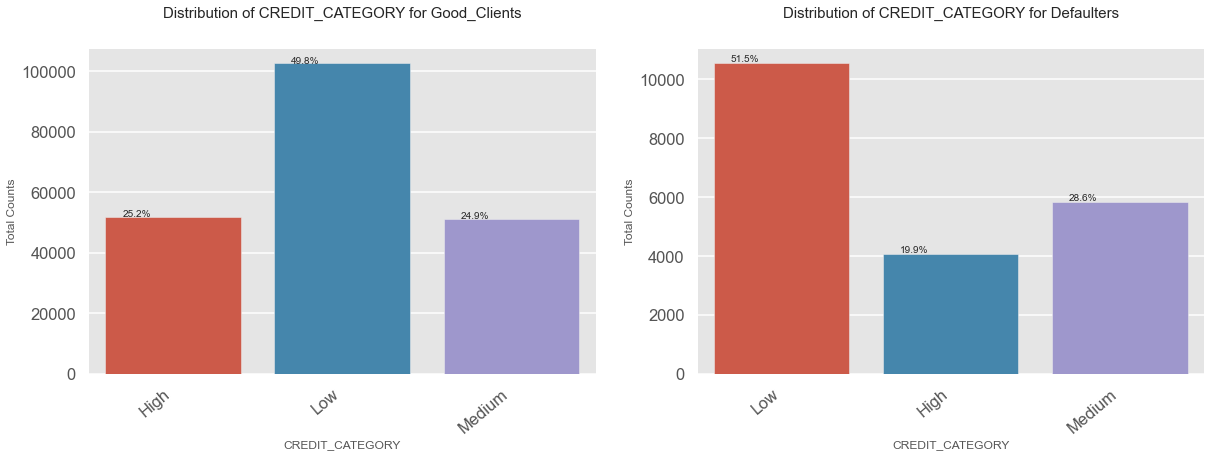

In [225]:
unianalysis('CREDIT_CATEGORY')

#### Insights obtained from above analysis:
##### 1) People with Low Credit Amt are more likely to take loans are therefore more likely to default as well
##### 2) 49.8 % of them are among Good Clients and 51.5 % are potential defaulters
##### 3)Conclusion : People with Low Credit Amount are more likely to default.

### C) CONTINUOUS VARIABLE ANALYSIS

In [226]:
# Reusable function to visualize plots for continuous variables
def contvar(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=good_clients[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Good Clients',fontsize=15)
            
    sns.distplot(a=defaulter_clients[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
        
    plt.show()

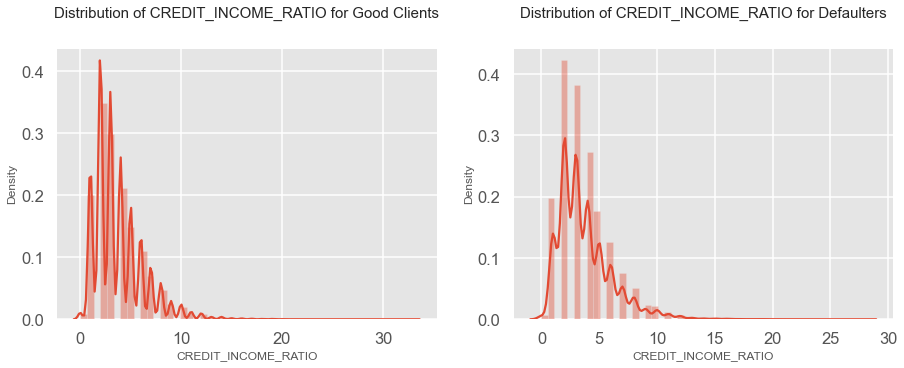

In [227]:
contvar('CREDIT_INCOME_RATIO')

#### Insights obtained from above analysis:
##### 1) Credit income ratio  is the ratio of AMT_CREDIT isto AMT_INCOME_TOTAL
##### 2) It's Evident that more number of people among good clients
### 3)Conclusion : No significant conclusion can be made.


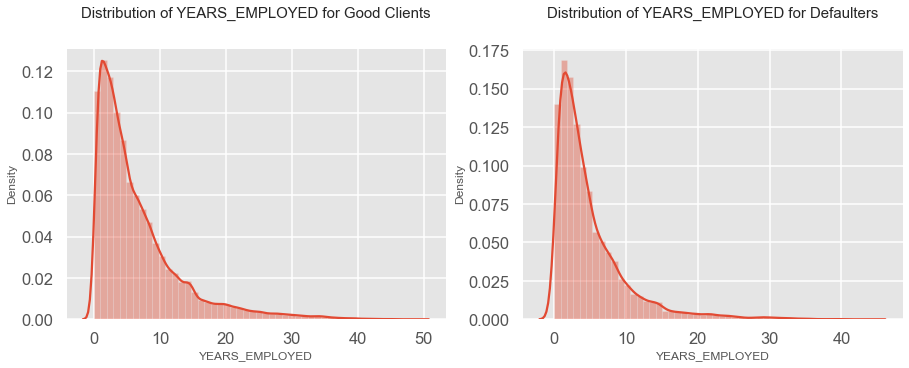

In [228]:
contvar('YEARS_EMPLOYED')

#### Only possible insight that can be made from above plot of years employed is people are both more likely to take loan and default 
#### before  20 years of work ecperience.

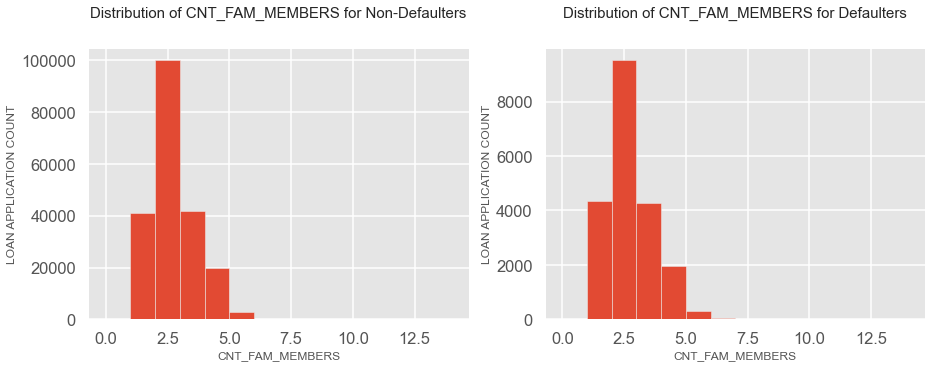

In [229]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
good_clients['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
defaulter_clients['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

#### We can see that a family of 3 applies loan more often than the other families. Potential Risks

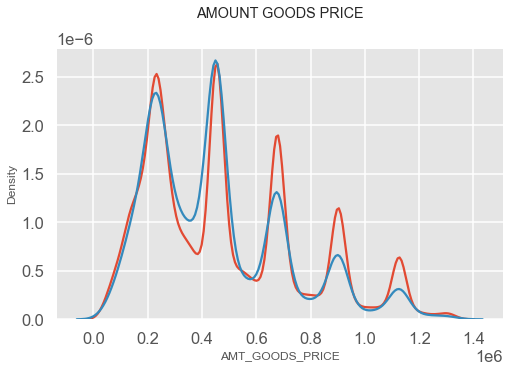

In [230]:
#plotting kde plot of 'AMT_GOODS_PRICE'
plt.figure(figsize = (8,5))
sns.kdeplot(good_clients['AMT_GOODS_PRICE'], label = 'default')
sns.kdeplot(defaulter_clients['AMT_GOODS_PRICE'], label = 'non-default')
plt.title('AMOUNT GOODS PRICE')
plt.show()

#### Not  much of an insight can be obtained since both the targets show similar results but most of them are concentrated at 0.5 that is around 500000 price.

### SEGMENTED UNIVARIATE ANALYSIS

#### AGE_GROUP AND INCOME_GROUP

In [231]:
# target by days birth
c = pd.DataFrame(clean_df.groupby(['AGE_GROUP','INCOME_GROUP'])['TARGET'].value_counts()/clean_df.groupby(['AGE_GROUP','INCOME_GROUP'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_ageinc = pd.pivot_table(c, values ='Per_Target', index =['AGE_GROUP','INCOME_GROUP'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_ageinc.drop(0, axis = 1, inplace = True)

target_by_ageinc1 = pd.pivot_table(target_by_ageinc, values = 1, index =['INCOME_GROUP'], 
                         columns =['AGE_GROUP'], aggfunc = np.sum) 

target_by_ageinc1

AGE_GROUP     (20, 25]  (25, 30]  (30, 35]  (35, 40]  (40, 45]  (45, 50]  \
INCOME_GROUP                                                               
High          0.108514  0.109350  0.102719  0.095172  0.082474  0.076121   
Low           0.130231  0.128252  0.116888  0.093685  0.082339  0.079604   
Medium        0.131243  0.117077  0.108233  0.101121  0.085851  0.078074   
VeryHigh      0.097774  0.091404  0.091317  0.082199  0.074997  0.073801   
VeryLow       0.130590  0.124228  0.118879  0.095968  0.084259  0.079661   

AGE_GROUP     (50, 55]  (55, 60]  (60, 65]  (65, 70]  
INCOME_GROUP                                          
High          0.077534  0.064047  0.045872  0.013423  
Low           0.072833  0.061772  0.062069  0.029412  
Medium        0.067063  0.059632  0.045356  0.028070  
VeryHigh      0.072082  0.058380  0.042786  0.029126  
VeryLow       0.064245  0.061249  0.051335  0.038168

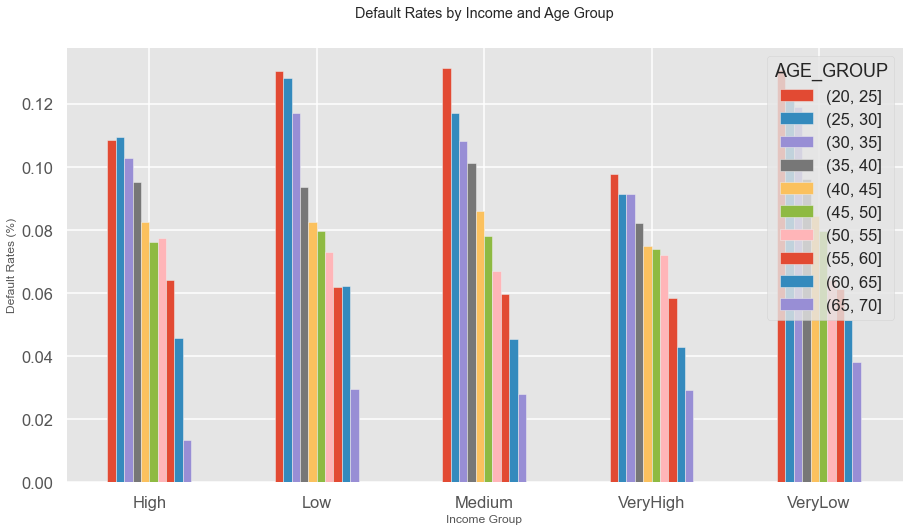

In [232]:
# figure
ax = target_by_ageinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 8),
    title='Default Rates by Income and Age Group'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

### Insights Obtained from above analysis:
1. Low and Medium  Income group  are more likely to be defaulters
2. Irrespective of Income Group as the age is increases people are less likely to  default

#### INCOME_GROUP AND CREDIT_CATEGORY

In [233]:
# target
c = pd.DataFrame(clean_df.groupby(['INCOME_GROUP','CREDIT_CATEGORY'])['TARGET'].value_counts()/clean_df.groupby(['INCOME_GROUP','CREDIT_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_creditinc = pd.pivot_table(c, values ='Per_Target', index =['INCOME_GROUP','CREDIT_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_creditinc.drop(0, axis = 1, inplace = True)

target_by_creditinc1 = pd.pivot_table(target_by_creditinc, values = 1, index =['INCOME_GROUP'], 
                         columns =['CREDIT_CATEGORY'], aggfunc = np.sum) 

target_by_creditinc1

CREDIT_CATEGORY      High       Low    Medium
INCOME_GROUP                                 
High             0.073799  0.089550  0.103941
Low              0.076013  0.098368  0.105744
Medium           0.075390  0.094402  0.107364
VeryHigh         0.066480  0.081762  0.092708
VeryLow          0.079018  0.096038  0.101925

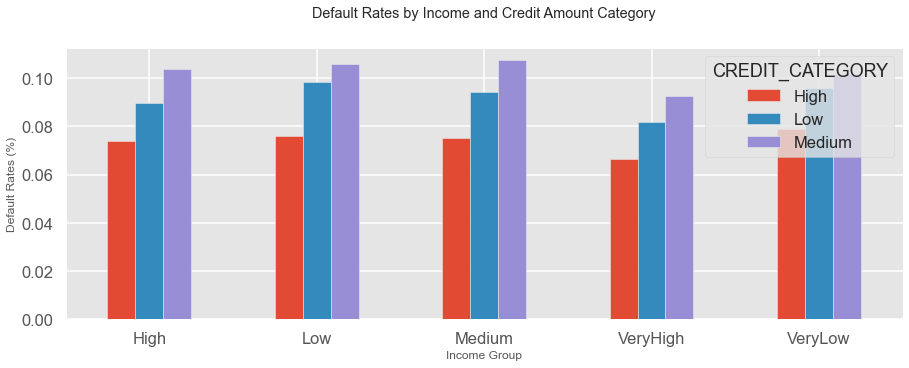

In [234]:
# figure
ax = target_by_creditinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Credit Amount Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

### Insights Obtained from above Analysis:
1. Irrespective of Income Group as Credit amount is increasing default rate is also increasing.
2. Also Very High income groups have significantly low Default rates irrespective of credit category.

# BIVARIATE ANALYSIS

### BIVARIATE ANALYSIS OF NUMERICAL - CATEGORICAL COLUMNS

In [235]:
categories = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'INCOME_GROUP', 
               'AGE_GROUP']

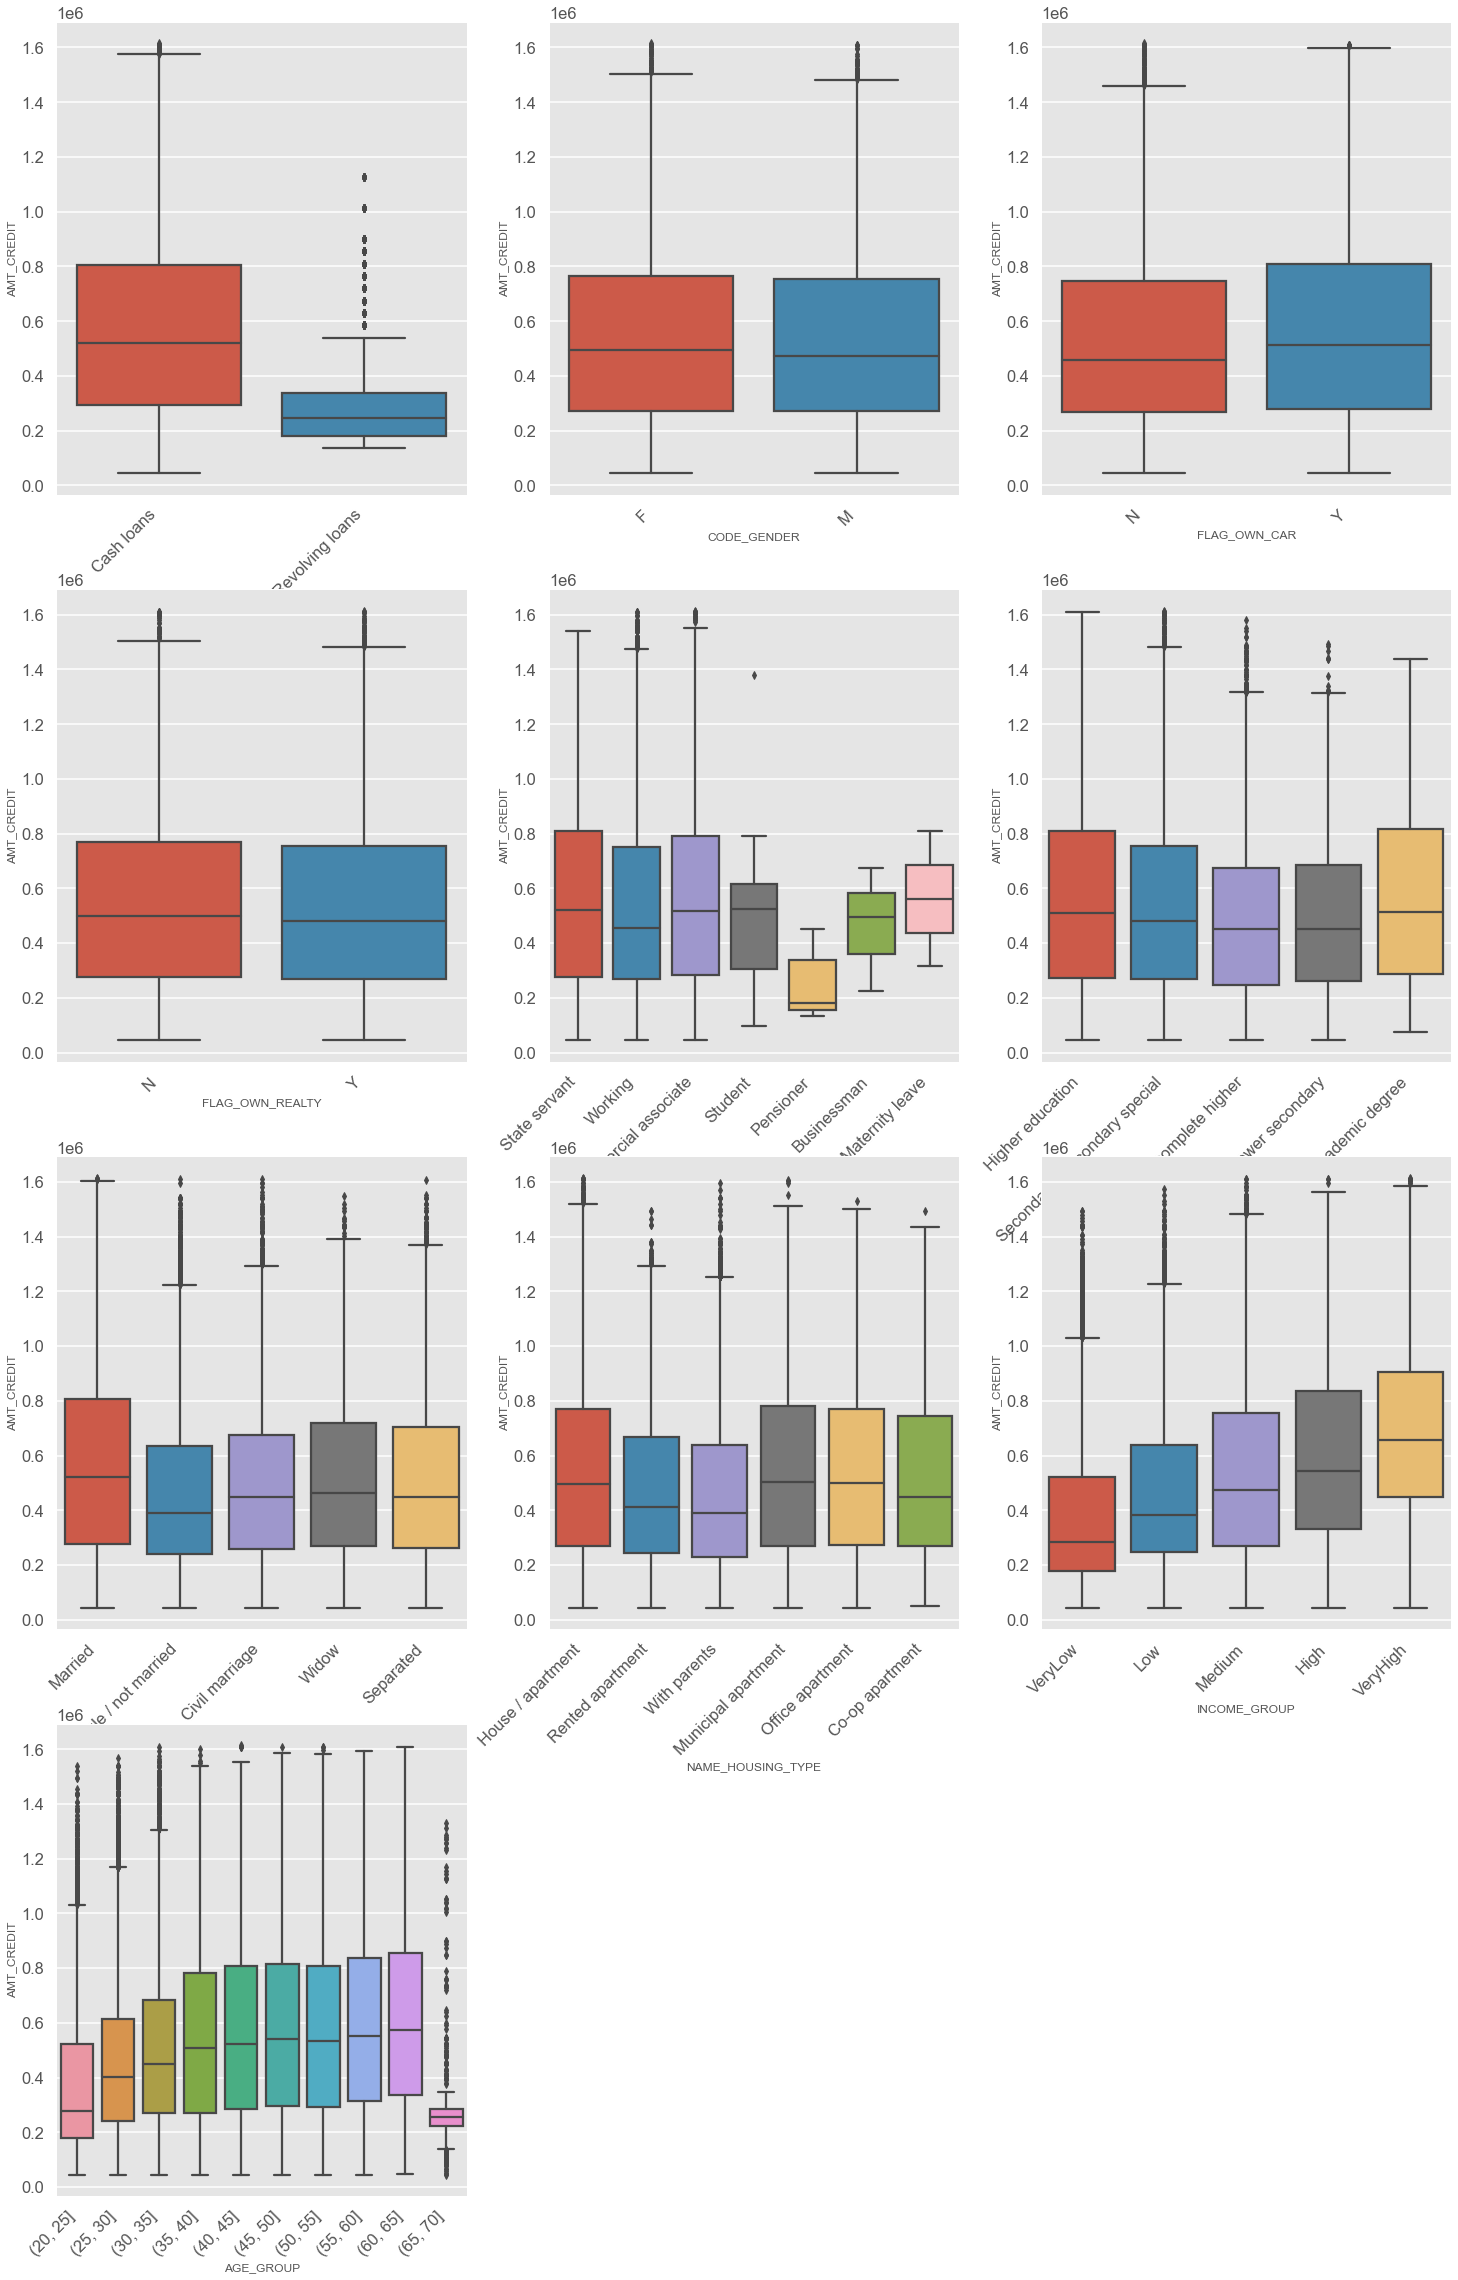

In [236]:
# Bivariate Analysis of GOOD CLIENTS
plt.figure(figsize=(25,40))

for i, category in enumerate(categories):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=good_clients)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### Insights obtained from above analysis:
1. Cash loans are more credited.
2. Those who are female and own car they got little more number of loans
3. State servent got more number of loans
4. Higher education got more loans
5. Married people got more number of loans
6. Clients who are living in municipal apartment, got more number of loans
7. High income group people got more loans.
8. Mig age people got more number of loans.

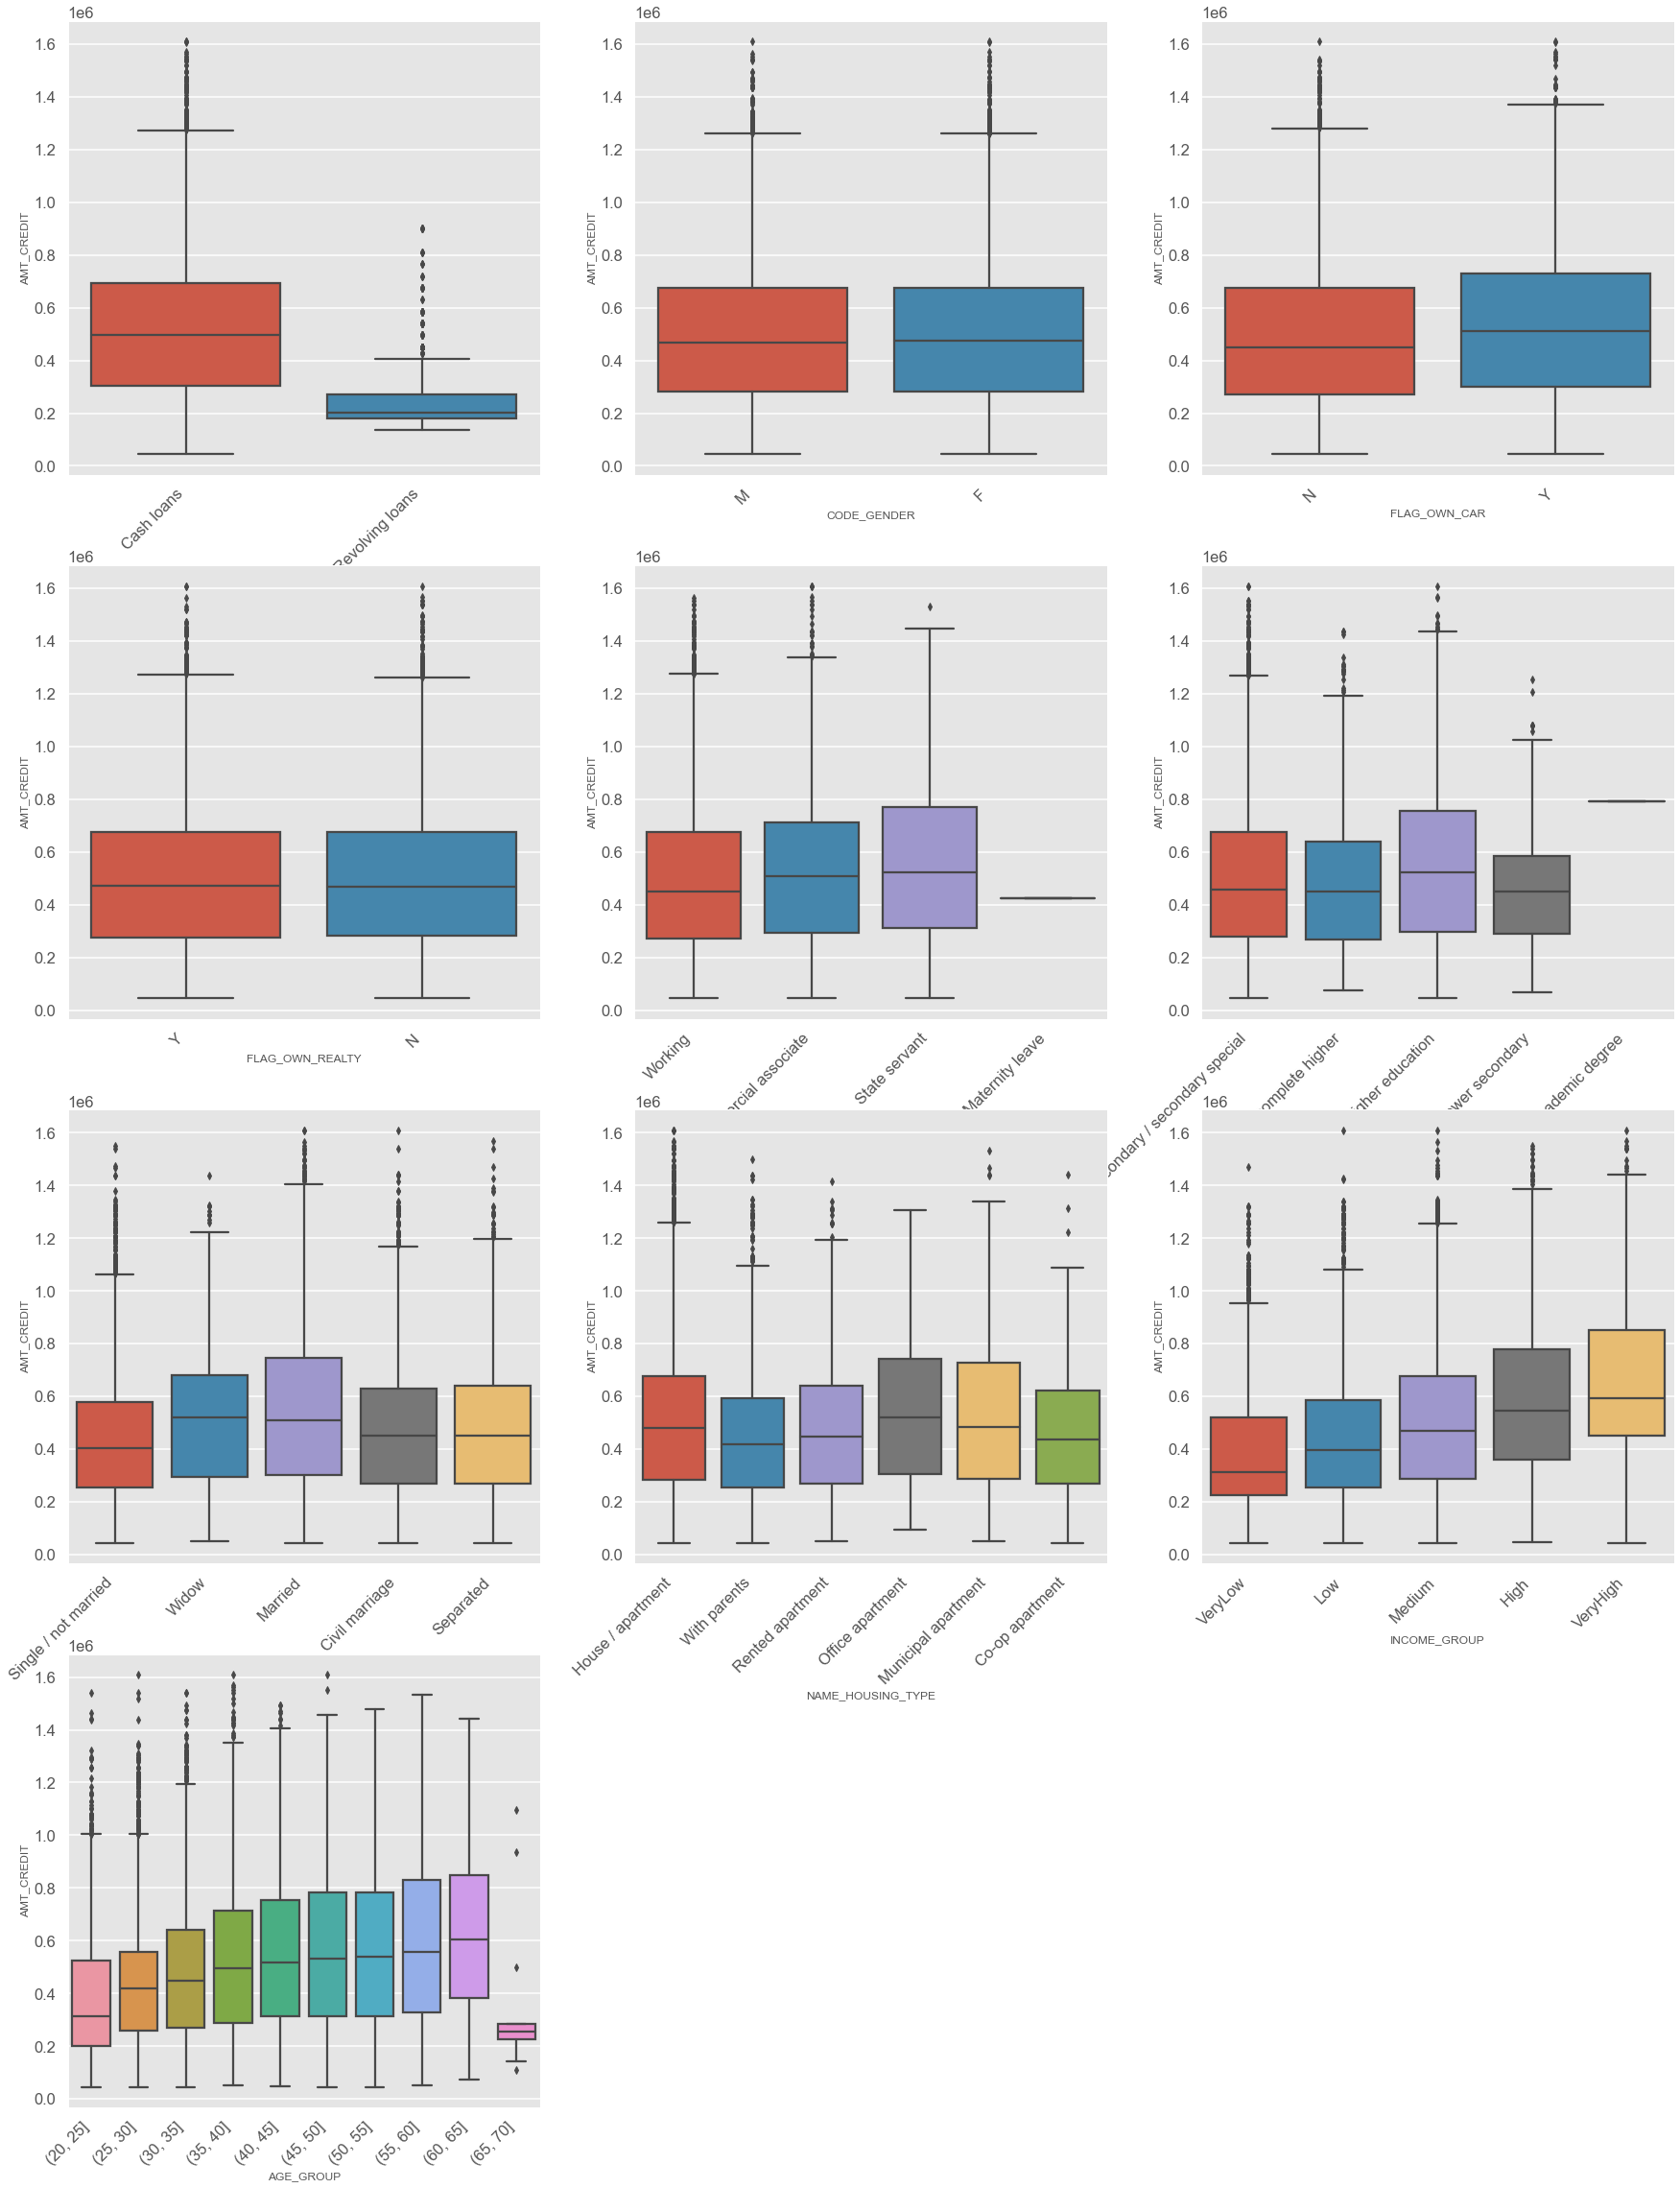

In [237]:
# Bivariate Analysis of Potential Defaulters:
plt.figure(figsize=(30,40))

for i, category in enumerate(categories):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data= defaulter_clients)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### Insights obtained from above analysis:
1. Cash loans are more credited.
2. Those who are female and own car they got little more number of loans
3. State servent got more number of loans
4. Higher education got more loans
5. Married people got more number of loans
6. Clients who are living in municipal apartment, got more number of loans
7. High income group people got more loans.

### b) BIVARIATE ANALYSIS OF NUMERICAL  - NUMERICAL COLUMNS

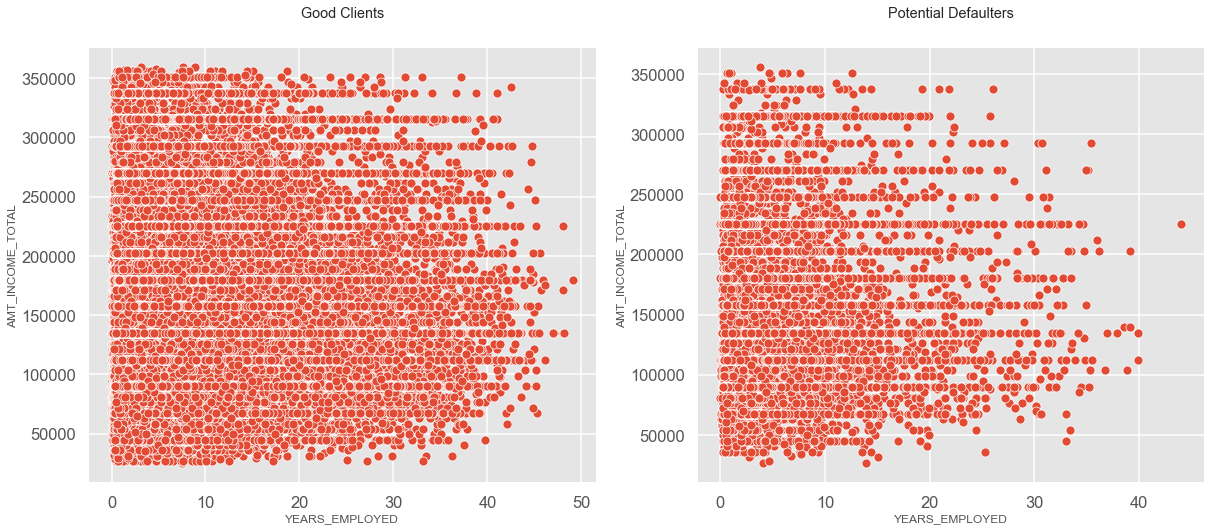

In [238]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=good_clients[good_clients['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Good Clients')

plt.subplot(1,2,2)
ax = sns.scatterplot(data=defaulter_clients[defaulter_clients['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Potential Defaulters')
plt.show()

#### Insights obtained:
1. Mid Range Income take more loans compared to other ranges
2. In defaulters list as the income is increasing potential defaulters tendency is decreasing.
3. People between below 20 years are more likely to default.
4. High number of good clients range from 10 to 40 years.
5. People Above 30 years and high income range could be good potential cusomers.

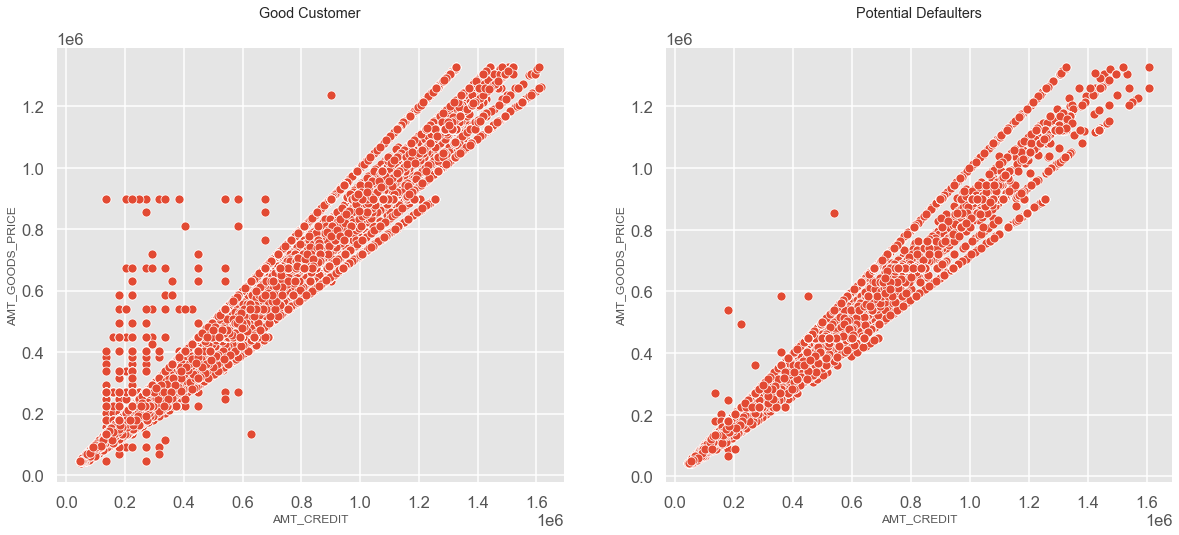

In [239]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=good_clients,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Good Customer')


plt.subplot(1,2,2)
ax = sns.scatterplot(data=defaulter_clients,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Potential Defaulters')

plt.show()

##### We can see that goods price is positively correlated with credit amount.

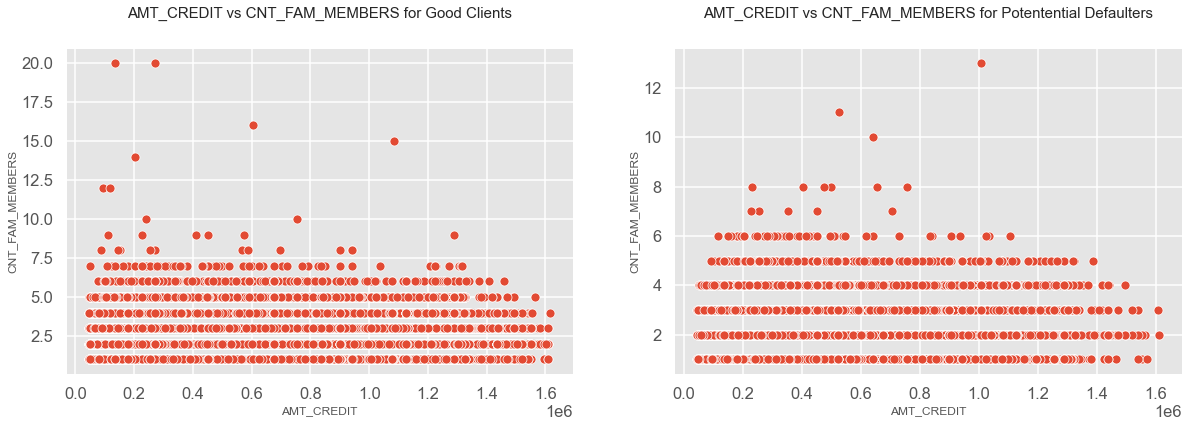

In [240]:
plt.style.use('ggplot')
sns.despine
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))    
sns.scatterplot(x='AMT_CREDIT', y='CNT_FAM_MEMBERS',data=good_clients,ax=ax1)
ax1.set_xlabel('AMT_CREDIT')    
ax1.set_ylabel('CNT_FAM_MEMBERS')
ax1.set_title('AMT_CREDIT vs CNT_FAM_MEMBERS for Good Clients',fontsize=15)
sns.scatterplot(x='AMT_CREDIT', y='CNT_FAM_MEMBERS',data=defaulter_clients,ax=ax2)
ax2.set_xlabel('AMT_CREDIT')    
ax2.set_ylabel('CNT_FAM_MEMBERS')
ax2.set_title('AMT_CREDIT vs CNT_FAM_MEMBERS for Potentential Defaulters',fontsize=15)
plt.show()

#### Insights obtained:
1. We can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. 
2. We can observe that larger families and people with larger AMT_CREDIT default less often.

### c) BIVARIATE ANALYSIS OF CATEGORICAL  - CATEGORICAL COLUMNS

##### Seperate Binning is required for this analysis

In [241]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

clean_df['AMT_INCOME_RANGE']=pd.cut(clean_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [242]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

clean_df['AMT_CREDIT_RANGE']=pd.cut(clean_df['AMT_CREDIT'],bins=bins,labels=slots)

In [243]:
good_clients = clean_df.loc[clean_df['TARGET'] == 0]
defaulter_clients = clean_df.loc[clean_df['TARGET'] == 1]

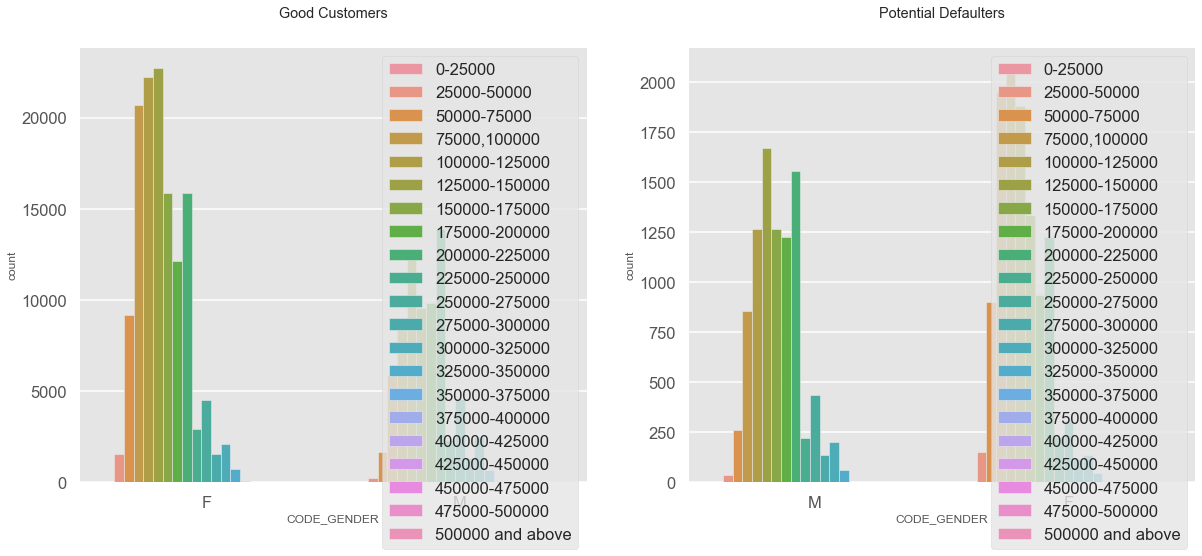

In [244]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(data= good_clients,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('Good Customers')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=defaulter_clients,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('Potential Defaulters')
plt.legend(loc='upper right')
plt.show()

#### Insights obtained from above analysis:
1. Females are table toppers in both the cases since the count in which they take loans is much higher than Males.
2. However relatively Males are much likely to gamble and default than Females if we see the Ratios with respect to count.
3. Conclusion: Males are potential risky Clients and should have thorough background check.


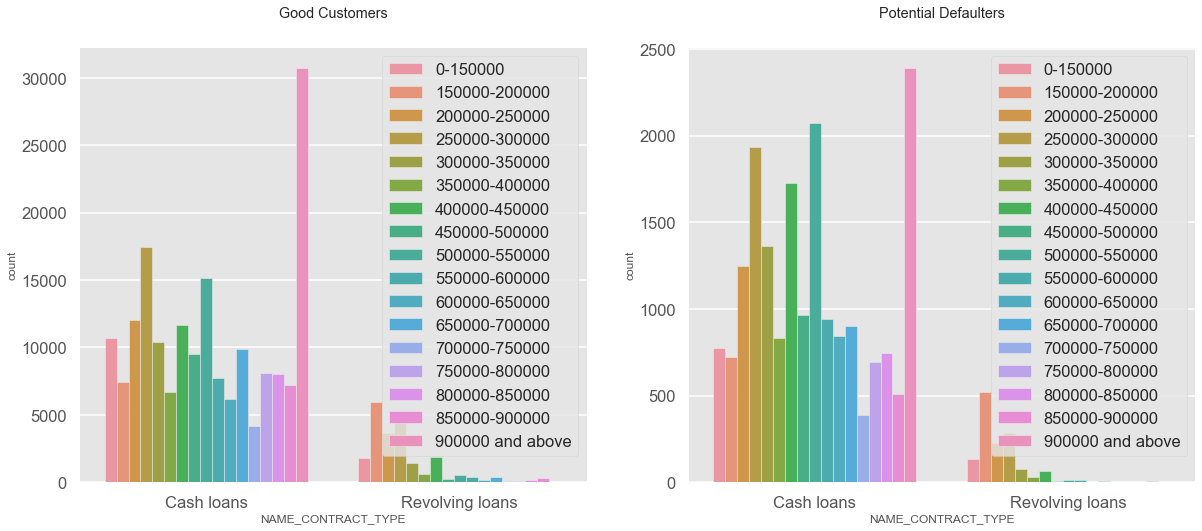

In [245]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(data=good_clients,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('Good Customers')
plt.legend(loc='upper right')


plt.subplot(1,2,2)
ax = sns.countplot(data=defaulter_clients,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('Potential Defaulters')
plt.legend(loc='upper right')
plt.show()

#### Insights obtained from above two analysis:
1. Cash Loans majorily contribute in both cases, however Revolving loans is almost similar in both the cases.
2. Most of the people in the defaulters list have taken cash loans.
3. Cash Loans in range 2 lakhs to 5 lakhs and then lower range of 1 lakhs to 1.5 lakh are more likely to default than other ranges.
4. Conclusion: Avoid giving Cash loans in low ranges and over all as well. Home Loans and Car Loans which directly deals with the dealers are much better.


## CORRELATION

### 1. Good Customers

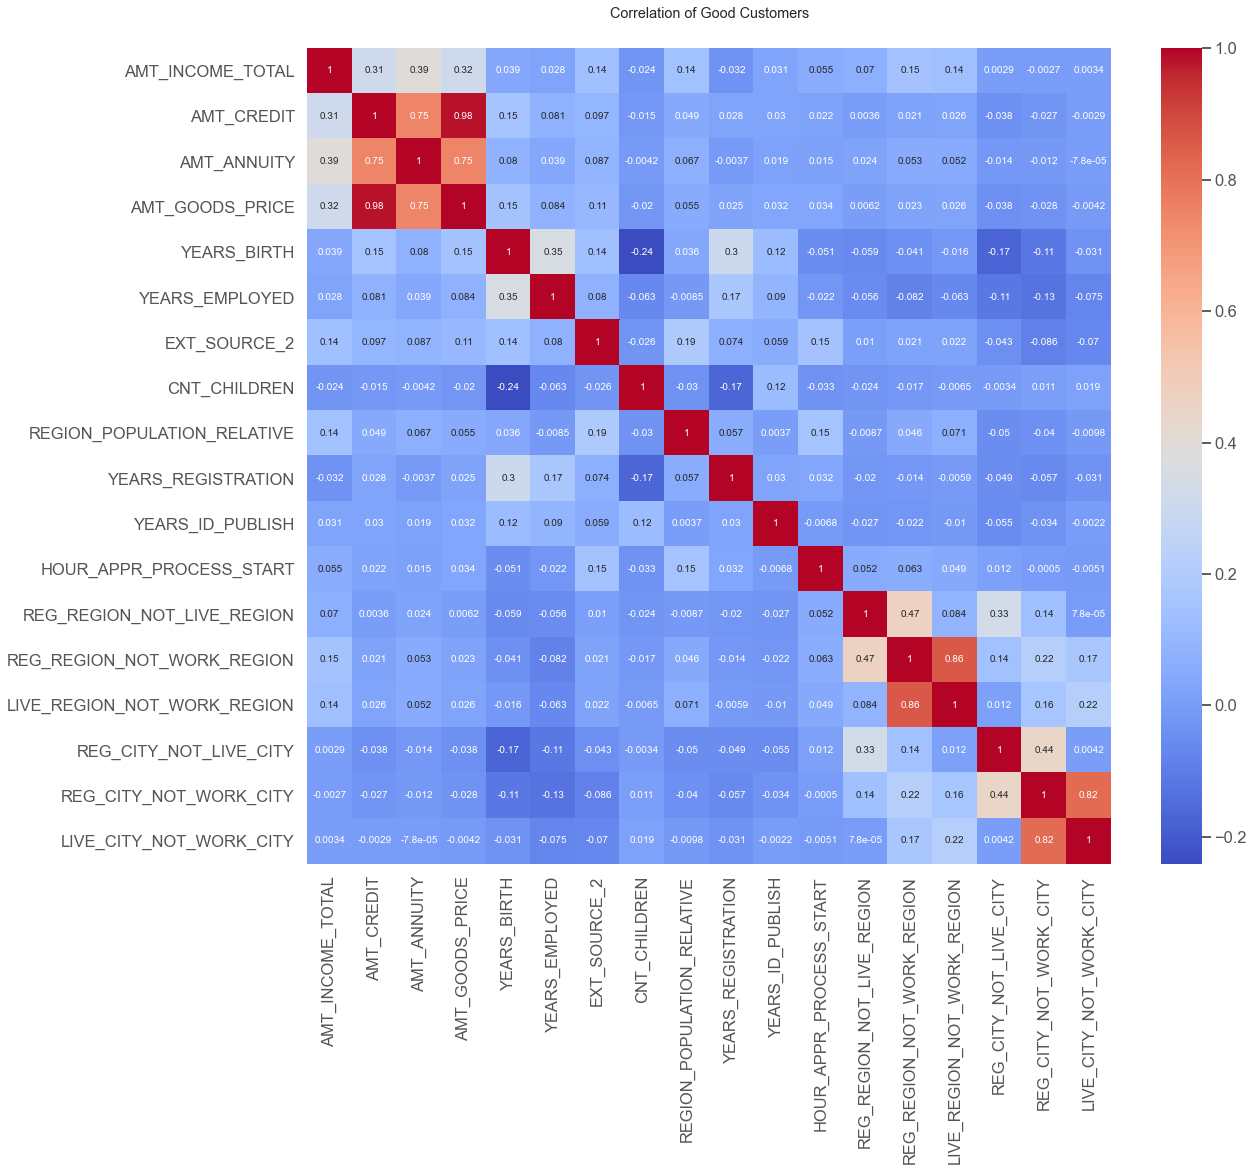

In [246]:
# plotting heatmap where TARGET = 0
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
              'EXT_SOURCE_2','CNT_CHILDREN','REGION_POPULATION_RELATIVE','YEARS_REGISTRATION',
        'YEARS_ID_PUBLISH','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
cor = good_clients[cols].corr()
plt.figure(figsize = (18,15))
sns.heatmap(cor,cmap="coolwarm", annot = True)
plt.title('Correlation of Good Customers')
plt.show()

As we can see from above correlation heatmap, There are number of observation we can point out

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

### 2.  Potential Defaulters

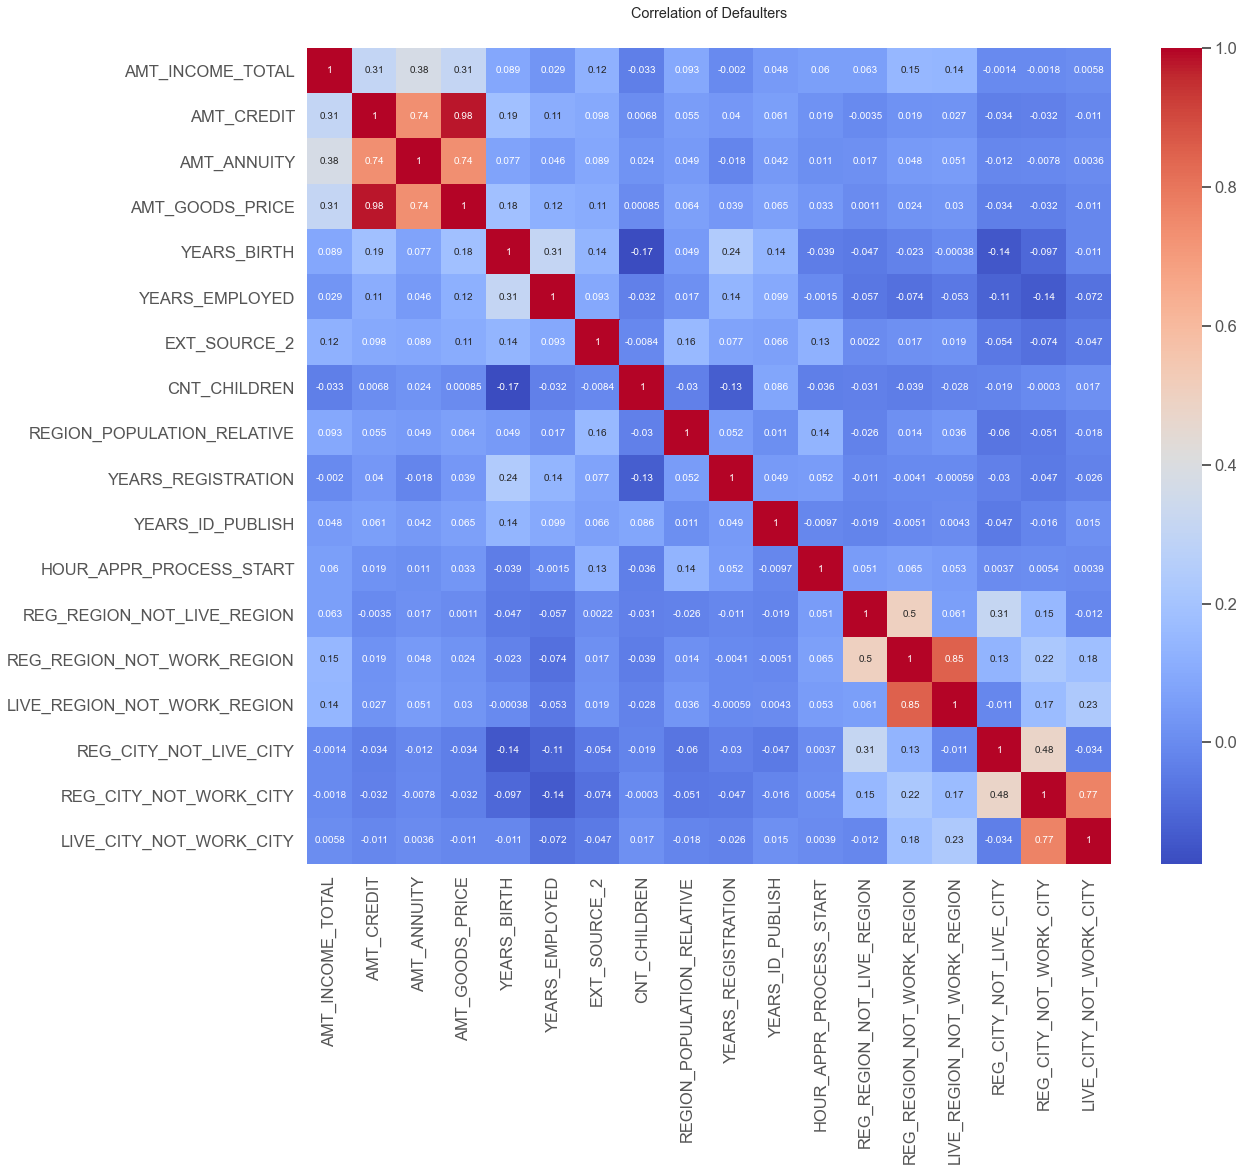

In [247]:
# plotting heatmap where TARGET = 0
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
              'EXT_SOURCE_2','CNT_CHILDREN','REGION_POPULATION_RELATIVE','YEARS_REGISTRATION',
        'YEARS_ID_PUBLISH','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
cor = defaulter_clients[cols].corr()
plt.figure(figsize = (18,15))
sns.heatmap(cor,cmap="coolwarm", annot = True)
plt.title('Correlation of Defaulters')
plt.show()

This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

1. The client's permanent address does not match contact address are having less children and vice-versa
2. the client's permanent address does not match work address are having less children and vice-versa

# PREVIOUS APPLICATION DATA

## 1. Reading and Analysing the previous application dataframe

In [248]:
prev_df = pd.read_csv('previous_application.csv')

In [249]:
prev_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [250]:
prev_df.shape

(1670214, 37)

In [251]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [252]:
prev_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

## 2. Handling Missing/Null Values

#### Alot of columns have 'XNA' and 'XNP' values which is needed to be treated.Therefore first step of action that will ease our cleaning will be to replace such values with NaN value.

In [253]:
prev_df.replace('XNA',np.nan,inplace=True)
prev_df.replace('XAP',np.nan,inplace=True)

In [254]:
#checking for missing value perventage columns wise
round(100*(prev_df.isnull().sum() / len(prev_df.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.02
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         95.83
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE              37.56
CODE_REJECT_REASON             81.33
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.12
NAME_GOODS_CATEGORY            56.93
NAME_PORTFOLIO                 22.29
NAME_PRODUCT_TYPE              63.68
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [255]:
#dropping all the columns which has missing value more than 35%
clean_previous_df = prev_df.drop(prev_df.columns[prev_df.isnull().mean() >= 0.35], axis = 1)

In [256]:
# dropping columns whicha are not significant for the analysis.
removable_columns = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 
                      'NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA','PRODUCT_COMBINATION']

previous_df = clean_previous_df.drop(removable_columns, axis = 1)

#### Handling missing values row wise

In [257]:
#### Removing missing values `AMT_ANNUITY`, `AMT_GOODS_PRICE`, `CNT_PAYMENT` row wise
print(len(previous_df[np.isnan(previous_df['AMT_ANNUITY']) & np.isnan(previous_df['AMT_GOODS_PRICE']) & np.isnan(previous_df['CNT_PAYMENT'])].index))


333855


In [258]:
#removing the rows where AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all have missing values as the number of rows are not very 
#large compare to the original data frame
previous_df = previous_df[~(np.isnan(previous_df['AMT_ANNUITY']) & np.isnan(previous_df['AMT_GOODS_PRICE']) & np.isnan(previous_df['CNT_PAYMENT']))]
previous_df.shape

(1336359, 14)

## 3. Treatment of Outliers

In [259]:
round(previous_df[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.9, 0.95, .99]),3)

AMT_ANNUITY  AMT_GOODS_PRICE  CNT_PAYMENT
count  1297979.000      1284699.000  1297984.000
mean     15955.121       227847.279       16.054
std      14782.137       315396.558       14.567
min          0.000            0.000        0.000
5%        2726.595        22882.500        0.000
25%       6321.780        50841.000        6.000
50%      11250.000       112320.000       12.000
75%      20658.420       234000.000       24.000
90%      34703.820       585000.000       36.000
95%      45336.780       900000.000       48.000
99%      69685.789      1395000.000       60.000
max     418058.145      6905160.000       84.000

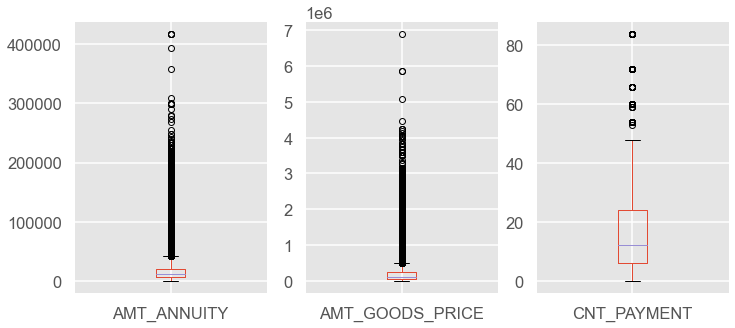

In [260]:
cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
plt.figure(figsize=(20,5))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    previous_df.boxplot(column = col)
plt.show()

#### We can see there are major outliers present in these numerical columns which are important for analysis, Therefore we can use 1.5 IQR method to remove such outliers

In [261]:
# removing outliers using 1.5 IQR method
for col in cols: 
    q1 = previous_df[col].quantile(0.25)
    q3 = previous_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    previous_df = previous_df.loc[(previous_df[col] > range_low) & (previous_df[col] < range_high)]

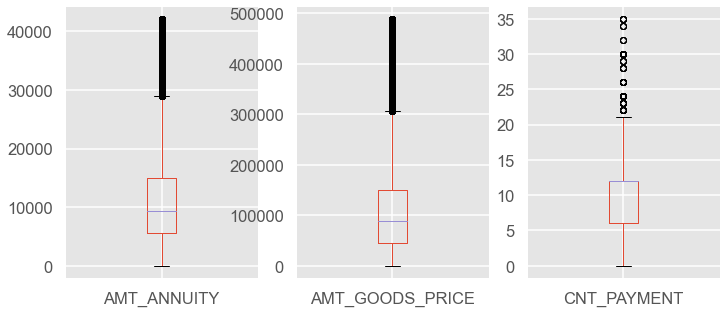

In [262]:
# Rexamining them after treatment
cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
plt.figure(figsize=(20,5))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    previous_df.boxplot(column = col)
plt.show()

## 4. Column Datatypes and Values

In [263]:
previous_df.dtypes

SK_ID_PREV                int64
SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_ANNUITY             float64
AMT_APPLICATION         float64
AMT_CREDIT              float64
AMT_GOODS_PRICE         float64
NAME_CONTRACT_STATUS     object
DAYS_DECISION             int64
NAME_CLIENT_TYPE         object
NAME_PORTFOLIO           object
CHANNEL_TYPE             object
CNT_PAYMENT             float64
NAME_YIELD_GROUP         object
dtype: object

In [264]:
previous_df.DAYS_DECISION.head()

0     -73
2    -301
4    -781
5    -684
11   -815
Name: DAYS_DECISION, dtype: int64

In [265]:
# As we can see that days_decision column have negative values which is no possible so first we will takecare of that by abs()
# Then we can convert it into years for better understanding.

In [266]:
# converting all DAYS columns to Years columns
previous_df['DAYS_DECISION'] = abs(previous_df['DAYS_DECISION'] // 365)

In [267]:
previous_df.dtypes

SK_ID_PREV                int64
SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_ANNUITY             float64
AMT_APPLICATION         float64
AMT_CREDIT              float64
AMT_GOODS_PRICE         float64
NAME_CONTRACT_STATUS     object
DAYS_DECISION             int64
NAME_CLIENT_TYPE         object
NAME_PORTFOLIO           object
CHANNEL_TYPE             object
CNT_PAYMENT             float64
NAME_YIELD_GROUP         object
dtype: object

### Rest all seems fine show we can move head with merging the previous application with the current ones and than perform EDA on it.

In [268]:
# selecting columns from the application data frame to merge
cols = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','INCOME_GROUP','AGE_GROUP','CREDIT_CATEGORY', 'YEARS_BIRTH']
application_df = clean_df[cols]
application_df.head()


SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100004       0           M  Secondary / secondary special   
3      100006       0           F  Secondary / secondary special   
4      100007       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS INCOME_GROUP AGE_GROUP CREDIT_CATEGORY  YEARS_BIRTH  
0  Single / not married         High  (25, 30]             Low    25.920548  
1               Married     VeryHigh  (45, 50]            High    45.931507  
2  Single / not married      VeryLow  (50, 55]             Low    52.180822  
3        Civil marriage       Medium  (50, 55]             Low    52.068493  
4  Single / not married       Medium  (50, 55]          Medium    54.608219

In [269]:
# merging previous application data with the subset of the application data frame
merged = pd.merge(previous_df,application_df, on='SK_ID_CURR', how='left')
merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
2     1784265      202054         Cash loans    31924.395         337500.0   
3     1383531      199383         Cash loans    23703.930         315000.0   
4     2257824      161140         Cash loans    13832.775         211500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0     17145.0          17145.0             Approved              1   
1    136444.5         112500.0             Approved              1   
2    404055.0         337500.0              Refused              3   
3    340573.5         315000.0             Approved              2   
4    246397.5         211500.0             Approved              3   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT  \
0         Repeater            POS             Country-wide         12.0   
1         Repeater           Cash  Credit and cash offices         12.0   
2         Repeater           Cash  Credit and cash offices         24.0   
3         Repeater           Cash  Credit and cash offices         18.0   
4         Repeater           Cash  Credit and cash offices         30.0   

  NAME_YIELD_GROUP  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0           middle     0.0           F              Incomplete higher   
1             high     0.0           F  Secondary / secondary special   
2             high     0.0           F  Secondary / secondary special   
3       low_normal     0.0           M  Secondary / secondary special   
4           middle     NaN         NaN                            NaN   

  NAME_FAMILY_STATUS INCOME_GROUP     AGE_GROUP CREDIT_CATEGORY  YEARS_BIRTH  
0            Married     VeryHigh  (35.0, 40.0]          Medium    39.569863  
1            Married      VeryLow  (25.0, 30.0]             Low    28.879452  
2            Married         High  (25.0, 30.0]          Medium    27.452055  
3     Civil marriage       Medium  (55.0, 60.0]            High    57.786301  
4                NaN          NaN           NaN             NaN          NaN

In [270]:
# checking for the null value column wise
merged.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY                  0
AMT_APPLICATION              0
AMT_CREDIT                   0
AMT_GOODS_PRICE              0
NAME_CONTRACT_STATUS         0
DAYS_DECISION                0
NAME_CLIENT_TYPE           628
NAME_PORTFOLIO               0
CHANNEL_TYPE                 0
CNT_PAYMENT                  0
NAME_YIELD_GROUP         84133
TARGET                  365311
CODE_GENDER             365311
NAME_EDUCATION_TYPE     365311
NAME_FAMILY_STATUS      365311
INCOME_GROUP            365311
AGE_GROUP               365311
CREDIT_CATEGORY         365311
YEARS_BIRTH             365311
dtype: int64

In [271]:
#removing the rows where TARGET column has null value due to left join
merged = merged[~np.isnan(merged['TARGET'])]

## UNIVARIATE ANALYSIS

### 1. Categorical Columns

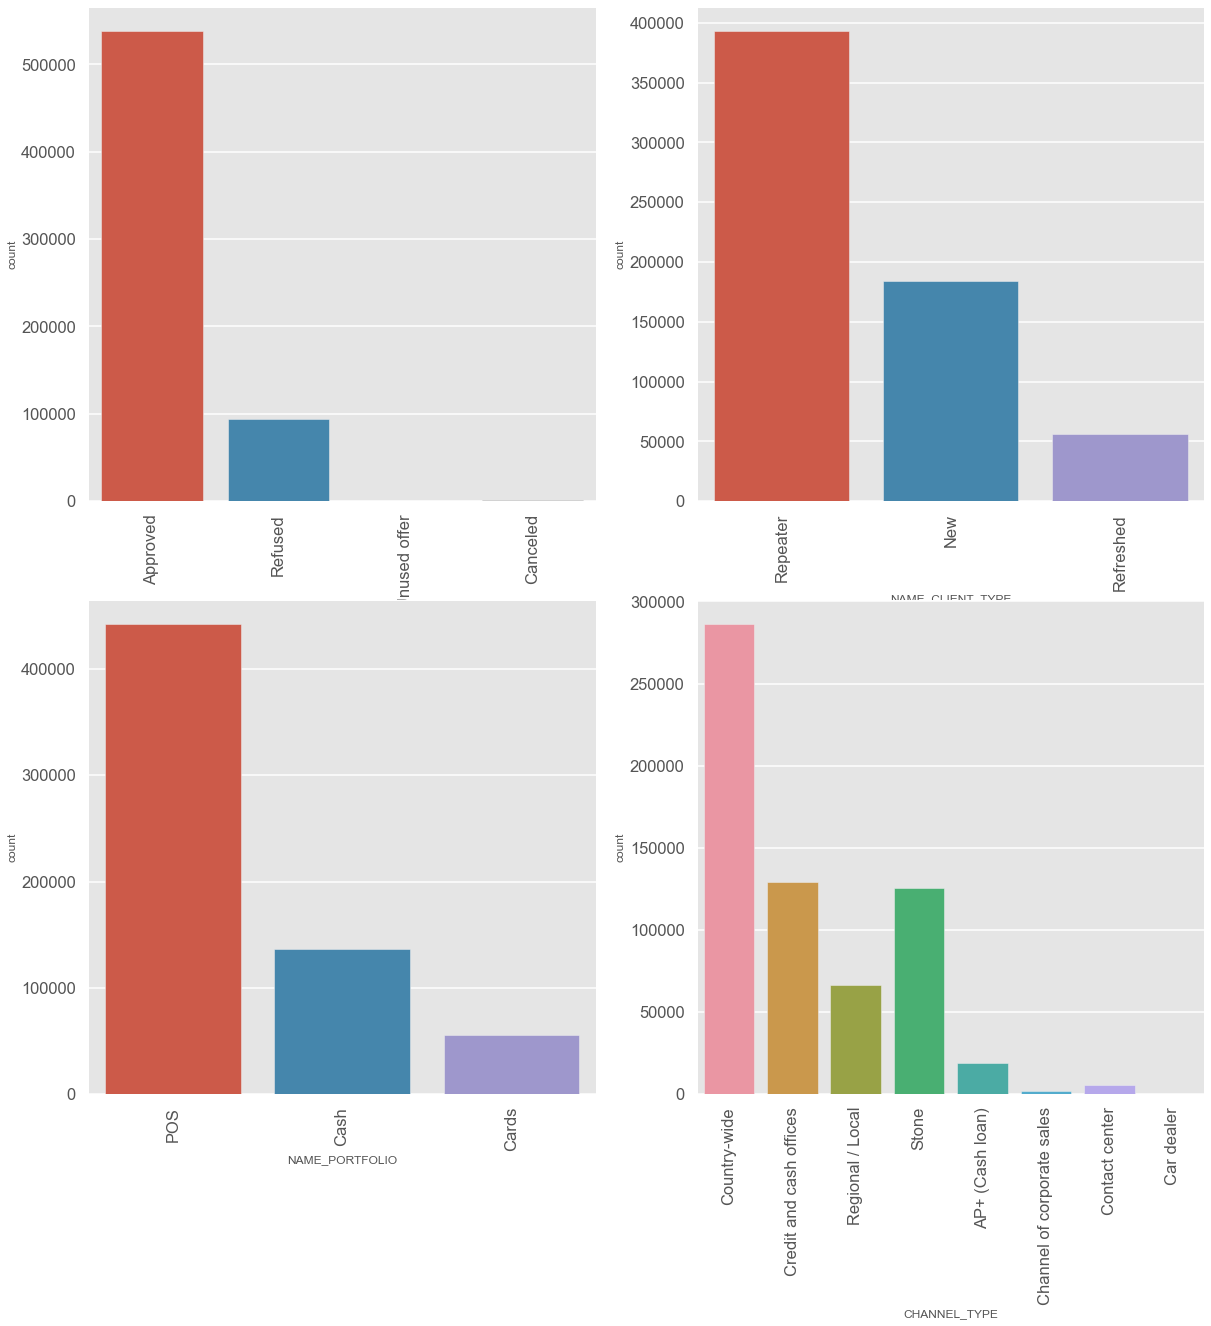

In [272]:
#plotting count plot for categorical columns
categorical = ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE']
plt.figure(figsize = (20,20))
i = 1
for col in categorical:
    plt.subplot(2,2,i)
    sns.countplot(x = col , data = merged)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

#### Insights obtained from above analysis
1. Approved loan status is huge than rejected or canceled.
2. Repeater clients are highest in number than new client.
3. POS loans are highest rather than cash loans.
4. Country-wide channel type is the most used channel followed by Credit and cash offers.

### 2.Continuous Columns

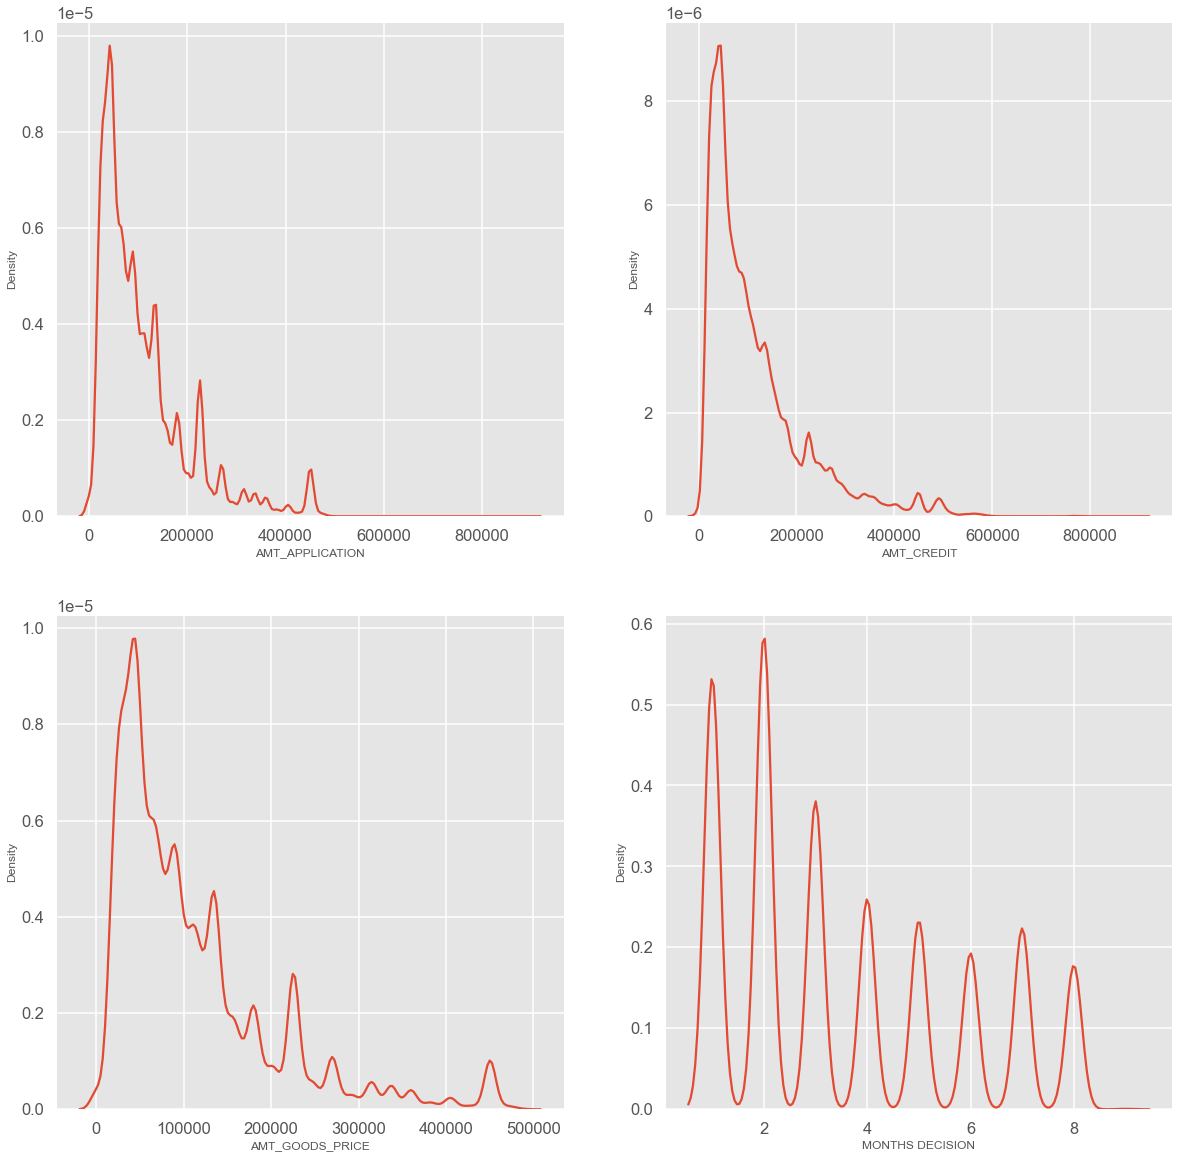

In [273]:
#plotting kde plot for categorical columns
continous = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION']

plt.figure(figsize = (20,20))
i = 1
for col in continous:
    plt.subplot(2,2,i)
    if col == 'DAYS_DECISION':
        ax = sns.kdeplot(merged[col], label = 'MONTHS DECISION')
        ax.set(xlabel = 'MONTHS DECISION')
    else:
        ax = sns.kdeplot(merged[col])
        ax.set(xlabel = col)
    i += 1
plt.show()

#### Insights obtained from above Analysis
1. Most of the loan application amount were below 500000, we can see a huge spike around 100000 amount.
2. Amount credited, is also following the pattern of loan application. We already saw that most of the application was approved in previous plots. 
3. Amount of the goods price is also following the same distribution like application amount and amount credited. Becasue, based on the price of the goods, the loan was approved and amount was credited.
4. Most of the applications decision took around 10 to 30 months.

## BIVARIATE ANALYSIS

In [274]:
subset = merged[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'CNT_PAYMENT', 'YEARS_BIRTH']]
subset.head()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  \
0     1730.430          17145.0     17145.0          17145.0              1   
1    15060.735         112500.0    136444.5         112500.0              1   
2    31924.395         337500.0    404055.0         337500.0              3   
3    23703.930         315000.0    340573.5         315000.0              2   
5    12165.210         148500.0    174361.5         148500.0              3   

   CNT_PAYMENT  YEARS_BIRTH  
0         12.0    39.569863  
1         12.0    28.879452  
2         24.0    27.452055  
3         18.0    57.786301  
5         24.0    54.643836

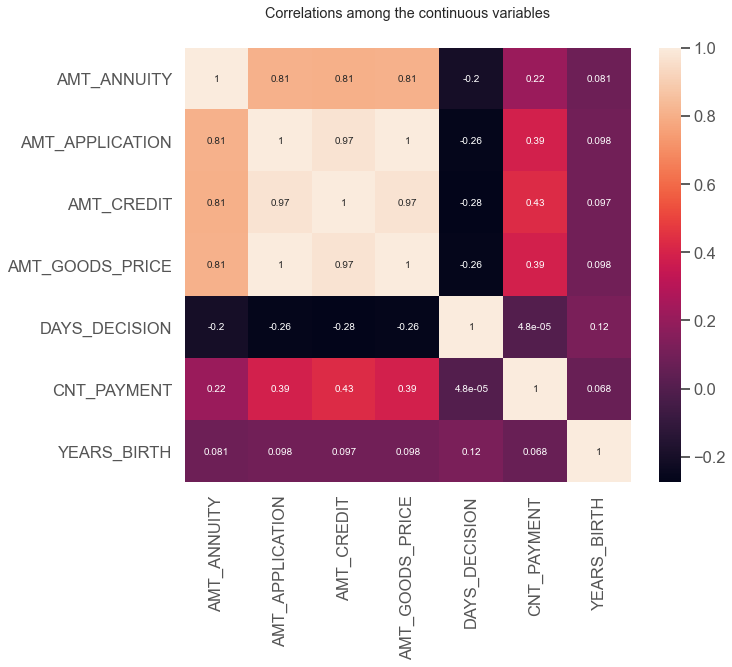

In [275]:
plt.figure(figsize = (10,8))
cor = subset.corr()
sns.heatmap(cor, annot = True)
plt.title('Correlations among the continuous variables')
plt.show()

#### Insights Obtained from above analysis:
1. Age is significantly correlated to all the Columns with Amount being a significant classifier.


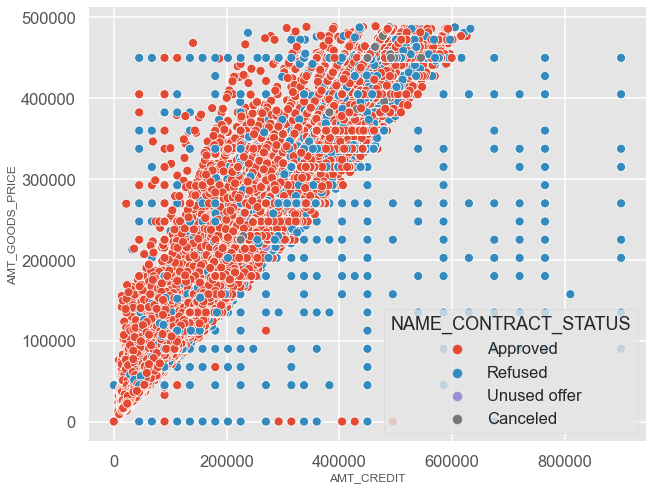

In [276]:
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_CREDIT', 'AMT_GOODS_PRICE', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

### Insights Obtained from above analysis:
1. AMT_GOODS_PRICE and AMT_CREDIT are positively correlated and mostly concentrated near the lower region.
2. High AMT_CREDIT loans are most likely to be refused.
3. Cancelled and Unused Offer are significantly small
3. Low AMT_CREDIT loans were accepted mostly.


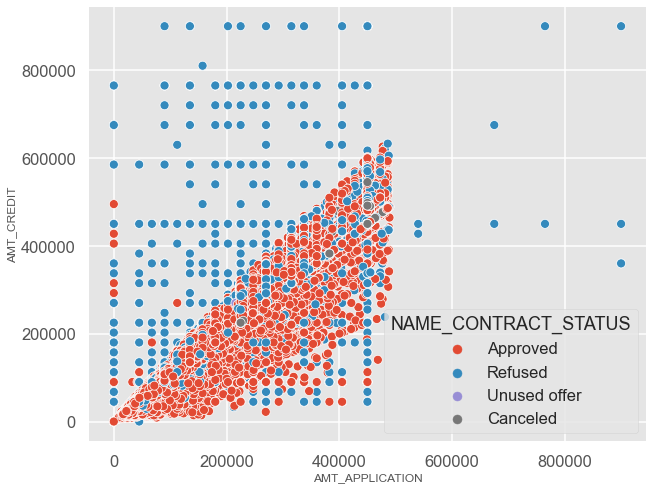

In [277]:
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_APPLICATION', 'AMT_CREDIT', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

### Insights obtained from above analysis:
1. High CREDIT_AMT were refused significantly.
2. However major amount of applicants were applying for mid range of credit_amt.

### Bivariate Analysis on Categorical Columns

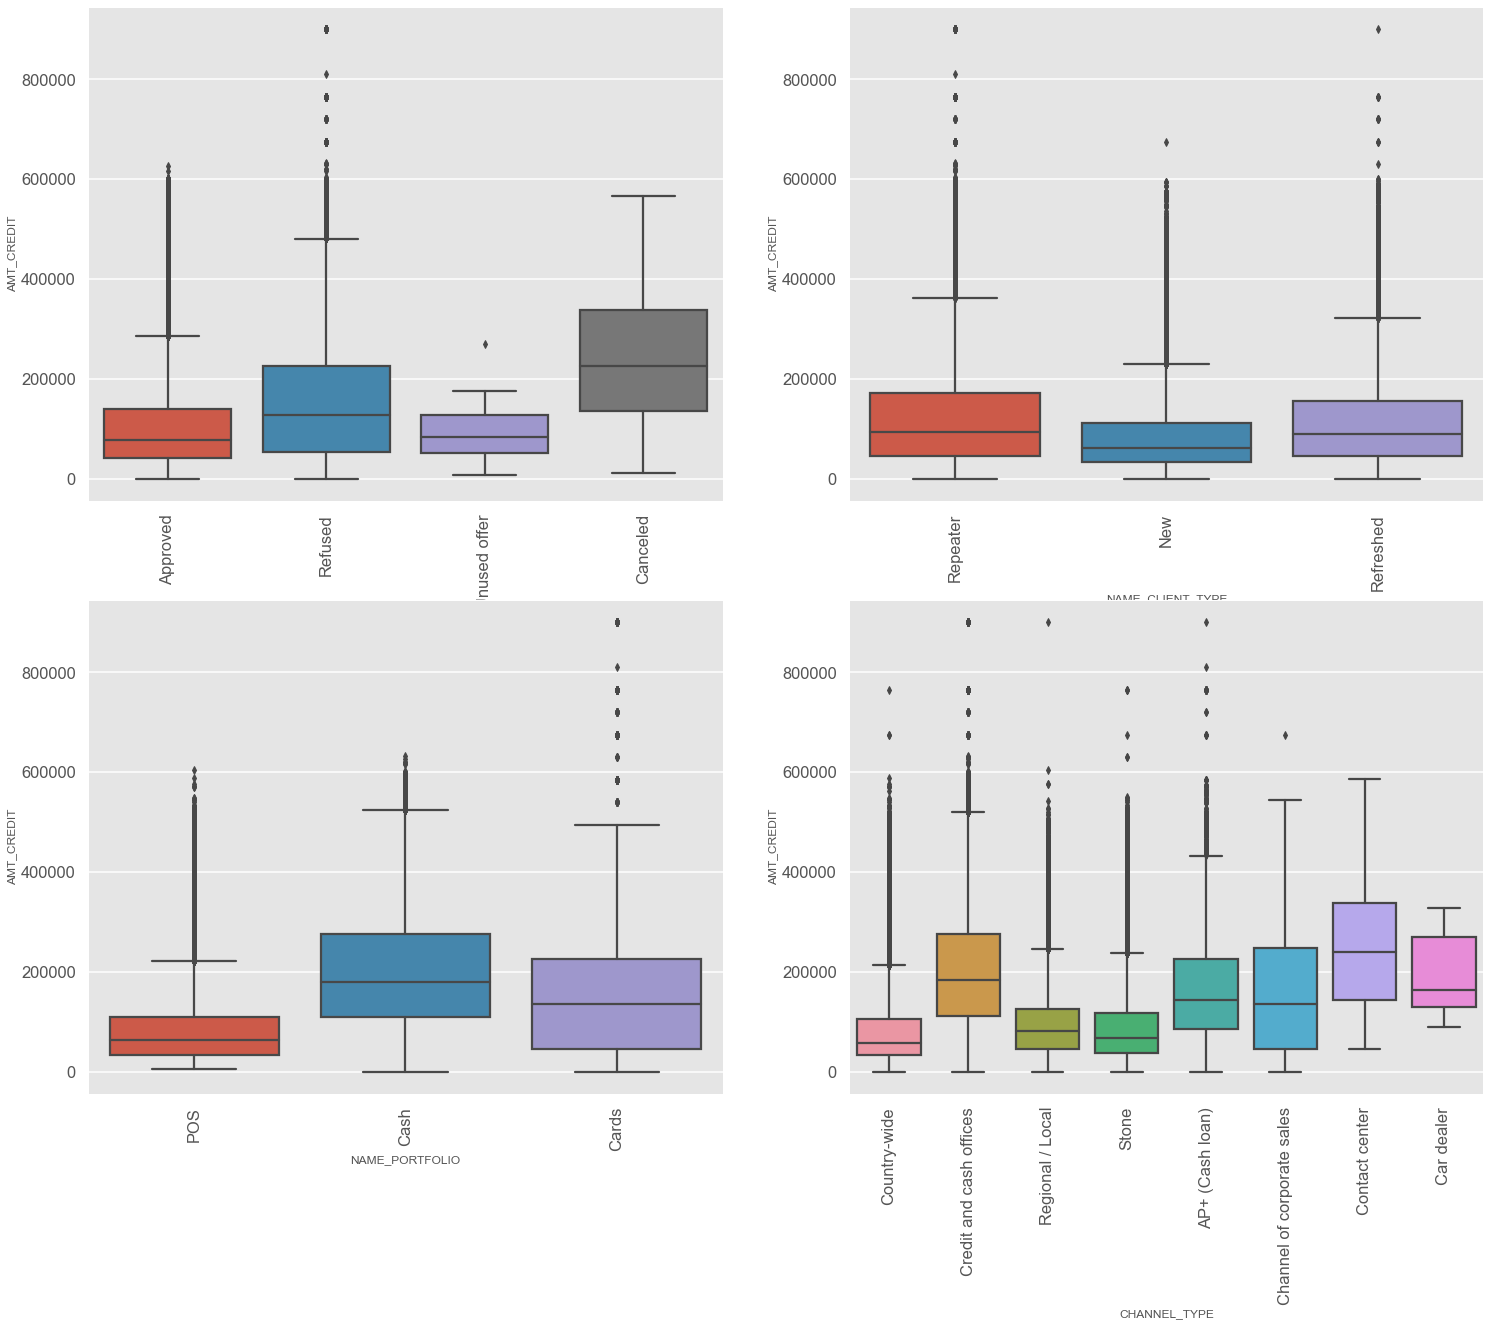

In [278]:
plt.figure(figsize=(25,20))
i=1
for category in categorical:
    ax = plt.subplot(2,2,i)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=merged)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    i += 1
plt.show()

#### Insights obtained from above Analysis
1. Most of the amount credit was cancelled in status
2. Repeater client got more loan credit
3. Cash loan got more credited.
4. Through the contact center channel, more loan got credited.

## The End